## Housing_Price_Prediction_Project :- Flip Robo Technologies |
Internship Batch No-31

# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?

# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# Technical Requirements:
• Data contains 1460 entries each having 81 variables. • Data contains Null values. You need to treat them using the domain knowledge and your own understanding. • Extensive EDA has to be performed to gain relationships of important variable and price. • Data contains numerical as well as categorical variable. You need to handle them accordingly. • You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. • You need to find important features which affect the price positively or negatively. • Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file. The “Data file.csv” and “Data description.txt” are enclosed with this file

In [1]:
!pip install imblearn

In [2]:
!pip install xgboost

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [4]:
train=pd.read_csv('train.csv')

In [5]:
train.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
311    139          60       RL         73.0     9066   Pave   NaN      IR1   
54    1050          20       RL         60.0    11100   Pave   NaN      Reg   
79    1349          20       RL          NaN    16196   Pave   NaN      IR3   
535    814          20       RL         75.0     9750   Pave   NaN      Reg   
68     530          20       RL          NaN    32668   Pave   NaN      IR1   
409     26          20       RL        110.0    14230   Pave   NaN      Reg   
866    698          20       RL         57.0     6420   Pave   NaN      IR1   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
1167   617          60       RL          NaN     7861   Pave   NaN      IR1   
305    497          20       RL          NaN    12692   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
311          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
54           Low    AllPub  ...        0    NaN    NaN         NaN       0   
79           Low    AllPub  ...        0    NaN    NaN         NaN       0   
535          Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
68           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
409          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
866          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
8            Lvl    AllPub  ...        0    NaN  GdPrv        Shed     400   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
305          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
311      12   2008        WD         Normal     230000  
54        4   2010        WD        Abnorml      84900  
79        8   2007        WD         Normal     215000  
535       4   2007       COD         Normal     157900  
68        3   2007        WD         Alloca     200624  
409       7   2009        WD         Normal     256300  
866       9   2006        WD         Normal     123500  
8         4   2007        WD         Normal     140000  
1167      6   2006        WD         Normal     183200  
305       5   2007        WD         Normal     430000  

[10 rows x 81 columns]

### Preprocessing of train data:

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

There are total 43 categorical columns among 81 columns.

In [8]:
#Checking Null:
null_val= train.isna().sum().any()
null_val

True

In [9]:
pd.set_option('display.max_rows',None) 
null_val= train.isna().sum().sort_values(ascending = False)
null_val_per =(null_val/train.shape[0])*100
l= [null_val, null_val_per]
ll= pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values')

print("missing value details \n\n", ll)

missing value details 

                Null Values  Null Values percentage
MoSold                   0                0.000000
LandContour              0                0.000000
Utilities                0                0.000000
YearBuilt                0                0.000000
LotConfig                0                0.000000
Neighborhood             0                0.000000
Condition1               0                0.000000
Condition2               0                0.000000
LotShape                 0                0.000000
BldgType                 0                0.000000
OverallQual              0                0.000000
LandSlope                0                0.000000
2ndFlrSF                 0                0.000000
HeatingQC                0                0.000000
GrLivArea                0                0.000000
SaleCondition            0                0.000000
SaleType                 0                0.000000
HouseStyle               0                0.000000
Street

<AxesSubplot:>

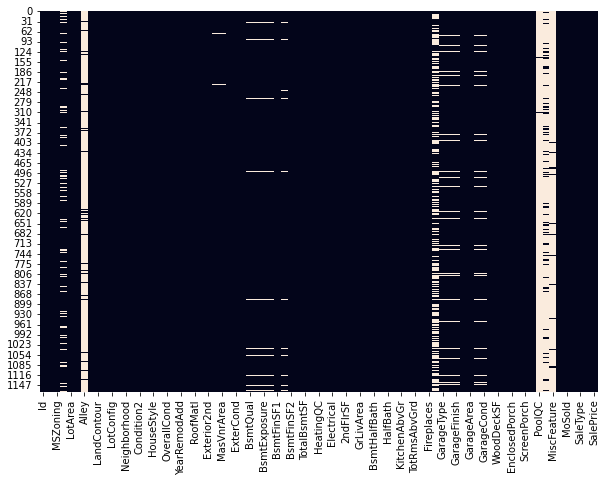

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(),cbar=False)

In [11]:
#checking duplicate

train.duplicated().sum()

0

### Statistical Matrix Evaluation:

In [12]:
train.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

In [13]:
train.describe(include=object)

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1168   1168    77     1168        1168      1168      1168   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        928   1164    41      740        1046      1168       842   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1168         1168       1168  ...       1104         1104   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1105          182       1005  ...        691          487   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1104       1104       1168      7    237          44     1168   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1050       1061       1071      3    129          40      999   

       SaleCondition  
count           1168  
unique             6  
top           Normal  
freq             945  

[4 rows x 43 columns]

### Imputing missing values:

In [14]:
print (train['FireplaceQu'].isna().sum()/train.shape[0])
print (train['Fence'].isna().sum()/train.shape[0])
print (train['Alley'].isna().sum()/train.shape[0])
print (train['MiscFeature'].isna().sum()/train.shape[0])
print (train['PoolQC'].isna().sum()/train.shape[0])

0.4717465753424658
0.7970890410958904
0.9340753424657534
0.9623287671232876
0.9940068493150684


FireplaceQu have arrount 50% missing data and rest of others have above 80% missing data. Let's drop those columns

In [15]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [16]:
null_val= train.isna().sum()
null_val_per =(null_val/train.shape[0])*100
l= [null_val, null_val_per]
ll= pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values')

print("missing value details \n\n", ll)

missing value details 

                Null Values  Null Values percentage
Id                       0                0.000000
BedroomAbvGr             0                0.000000
HalfBath                 0                0.000000
FullBath                 0                0.000000
BsmtHalfBath             0                0.000000
BsmtFullBath             0                0.000000
GrLivArea                0                0.000000
KitchenAbvGr             0                0.000000
LowQualFinSF             0                0.000000
1stFlrSF                 0                0.000000
Electrical               0                0.000000
CentralAir               0                0.000000
HeatingQC                0                0.000000
Heating                  0                0.000000
SaleCondition            0                0.000000
2ndFlrSF                 0                0.000000
BsmtUnfSF                0                0.000000
KitchenQual              0                0.000000
Functi

### GarageType imputation:

In [17]:
train["GarageType"].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [18]:
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageType'].isnull().sum()

0

In [19]:
#GarageYrBlt: Year garage was built

In [20]:
train["GarageYrBlt"].nunique()

97

In [21]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['GarageYrBlt'].isnull().sum()

0

As GarageType is a categorical data , imoute this with mode()

### GarageFinish imputation:

In [22]:
train['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [23]:
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageFinish'].isnull().sum()

0

### GarageCond imputation:

In [24]:
train['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [25]:
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageCond'].isnull().sum()

0

### GarageQual imputation:

In [26]:
train['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [27]:
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageQual'].isnull().sum()

0

### BsmtFinType2 imputation:

In [28]:
train['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [29]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtFinType2'].isnull().sum()

0

### BsmtExposure imputation:

In [30]:
train['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [31]:
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtExposure'].isnull().sum()

0

### BsmtFinType1 imputation:

In [32]:
train['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [33]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType1'].isnull().sum()

0

### BsmtQual imputation:

In [34]:
train['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [35]:
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtQual'].isnull().sum()

0

### MasVnrType imputation:

In [36]:
train['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [37]:
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrType'].isnull().sum()

0

### MasVnrArea imputation:

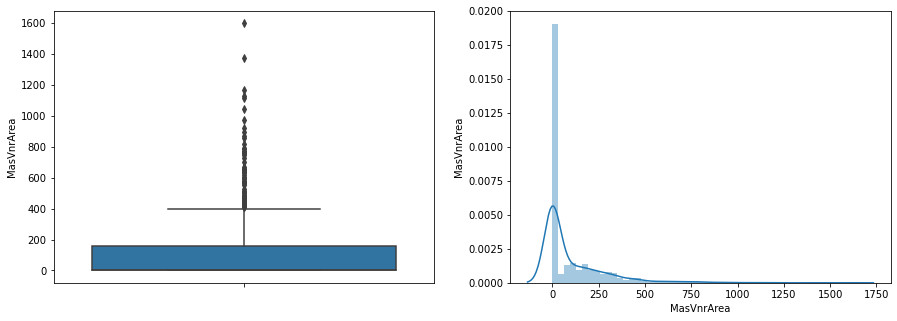

In [38]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'MasVnrArea', data= train,ax=ax[0])
plt.ylabel('MasVnrArea')
sns.distplot(train['MasVnrArea'] ,ax=ax[1])
plt.xlabel('MasVnrArea')
plt.show()

In [39]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['MasVnrArea'].isnull().sum()

0

### Missing Value Check after imputation:

In [40]:
null_val= train.isna().sum().any()
null_val

True

### Data cleaning:

In [41]:
pd.set_option('display.max_rows',None) 
train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

In [42]:
train["Street"].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [43]:
train["CentralAir"].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

In [44]:
train["Utilities"].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [45]:
train.drop(["Utilities","Id", "Street"],axis=1,inplace=True)

In [46]:
train['YearBuilt_age'] = train['YearBuilt'].max() - train['YearBuilt']
train['YearRemodAdd_age'] = train['YearRemodAdd'].max() - train['YearRemodAdd']
train['YrSold_age'] = train['YrSold'].max() - train['YrSold']
train['GarageYrBlt_age'] = train['GarageYrBlt'].max() - train['GarageYrBlt']

# dropping old columns 

train.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

### Exploratory Data Analysis:

In [47]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1168 non-null   int64  
 1   MSZoning          1168 non-null   object 
 2   LotFrontage       954 non-null    float64
 3   LotArea           1168 non-null   int64  
 4   LotShape          1168 non-null   object 
 5   LandContour       1168 non-null   object 
 6   LotConfig         1168 non-null   object 
 7   LandSlope         1168 non-null   object 
 8   Neighborhood      1168 non-null   object 
 9   Condition1        1168 non-null   object 
 10  Condition2        1168 non-null   object 
 11  BldgType          1168 non-null   object 
 12  HouseStyle        1168 non-null   object 
 13  OverallQual       1168 non-null   int64  
 14  OverallCond       1168 non-null   int64  
 15  RoofStyle         1168 non-null   object 
 16  RoofMatl          1168 non-null   object 


### For MSSubClass:

In [49]:
train["MSSubClass"].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

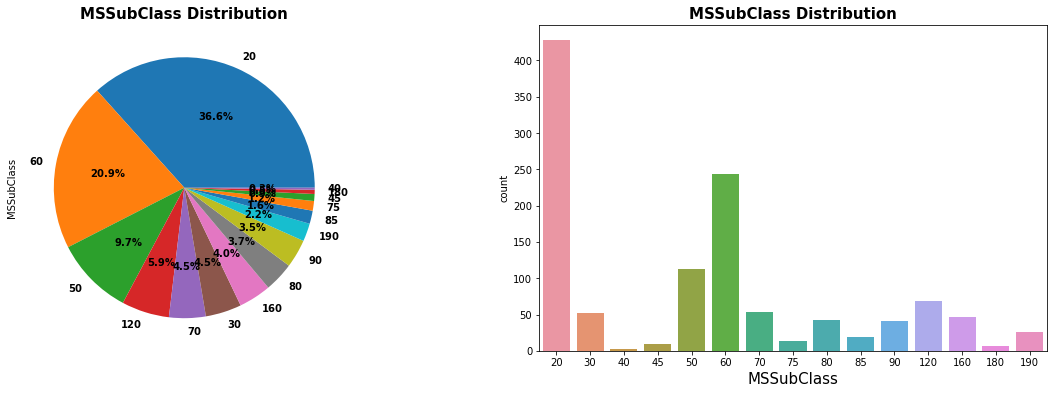

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['MSSubClass'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('MSSubClass Distribution', fontsize=15,fontweight ='bold')
sns.countplot('MSSubClass',data=train,ax=ax[1])
ax[1].set_title('MSSubClass Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('MSSubClass',fontsize=15)
plt.show()

### Observations:

MSSubClass: Identifies the type of dwelling involved in the sale.

    20  1-STORY 1946 & NEWER ALL STYLES
    30  1-STORY 1945 & OLDER
    40  1-STORY W/FINISHED ATTIC ALL AGES
    45  1-1/2 STORY - UNFINISHED ALL AGES
    50  1-1/2 STORY FINISHED ALL AGES
    60  2-STORY 1946 & NEWER
    70  2-STORY 1945 & OLDER
    75  2-1/2 STORY ALL AGES
    80  SPLIT OR MULTI-LEVEL
    85  SPLIT FOYER
    90  DUPLEX - ALL STYLES AND AGES
   120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150  1-1/2 STORY PUD - ALL AGES
   160  2-STORY PUD - 1946 & NEWER
   180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190  2 FAMILY CONVERSION - ALL STYLES AND AGES

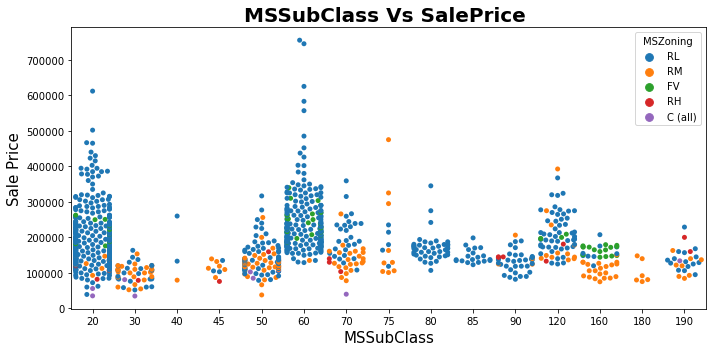

In [51]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=train['MSSubClass'], y=train['SalePrice'], hue=train["MSZoning"])
plt.title("MSSubClass Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.xlabel('MSSubClass',fontsize = 15)
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

### For MSZoning:

In [52]:
train["MSZoning"].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

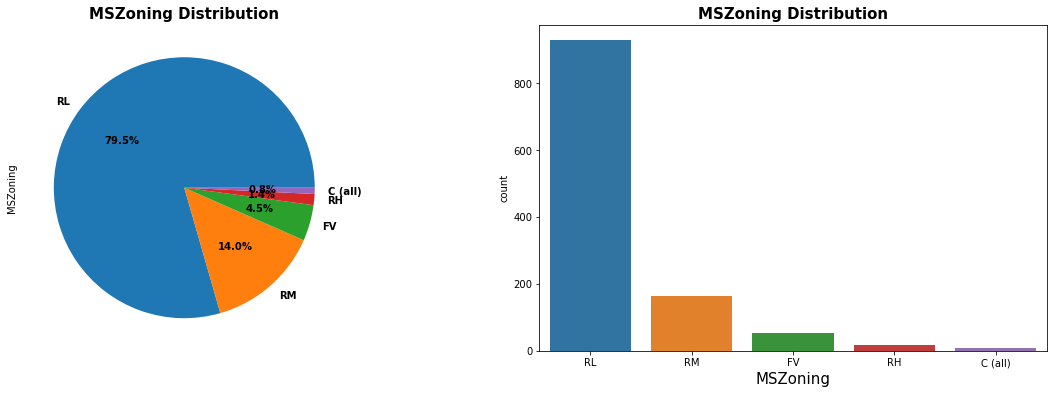

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['MSZoning'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('MSZoning Distribution', fontsize=15,fontweight ='bold')
sns.countplot('MSZoning',data=train,ax=ax[1])
ax[1].set_title('MSZoning Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('MSZoning',fontsize=15)
plt.show()

# Observations:
MSZoning: Identifies the general zoning classification of the sale.

   A    Agriculture
   C    Commercial
   FV   Floating Village Residential
   I    Industrial
   RH   Residential High Density
   RL   Residential Low Density
   RP   Residential Low Density Park 
   RM   Residential Medium Density


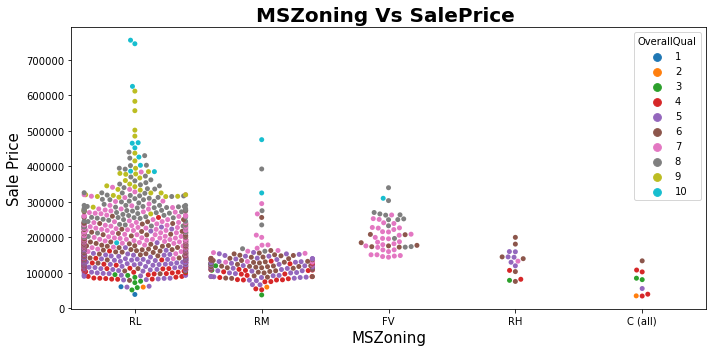

In [54]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=train['MSZoning'], y=train['SalePrice'], hue= train["OverallQual"])
plt.title("MSZoning Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 15)
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

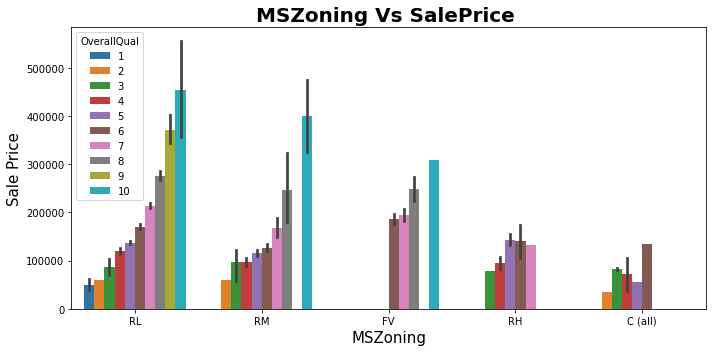

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x=train['MSZoning'], y=train['SalePrice'], hue= train["OverallQual"])
plt.title("MSZoning Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 15)
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

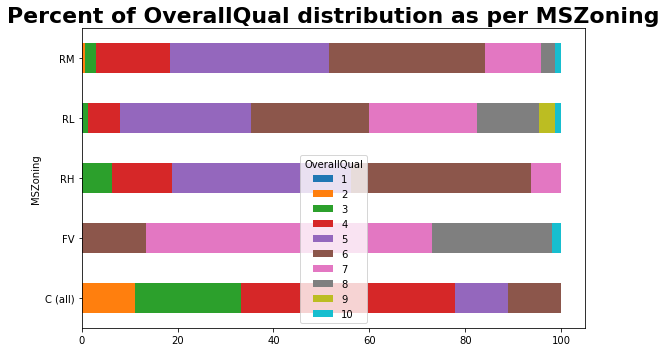

In [56]:
table= pd.crosstab(train['MSZoning'], train['OverallQual'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of OverallQual distribution as per MSZoning', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

Observations:
Max property have overall condition rating of either 6 to 7.
Avg saling price for RL zone property is 200000-500000 .
In Commerical zone the property price is minimum.
Sale Price inside RL Zone is much higher than other zone.
It is clear that if OverallQual increased, SalePrice allso increased

### For LotFrontage:

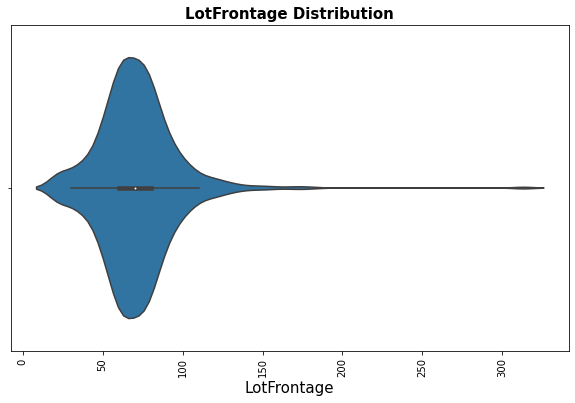

In [57]:
plt.subplots(figsize=(10,6))
sns.violinplot(train.LotFrontage,data=train)
plt.title('LotFrontage Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

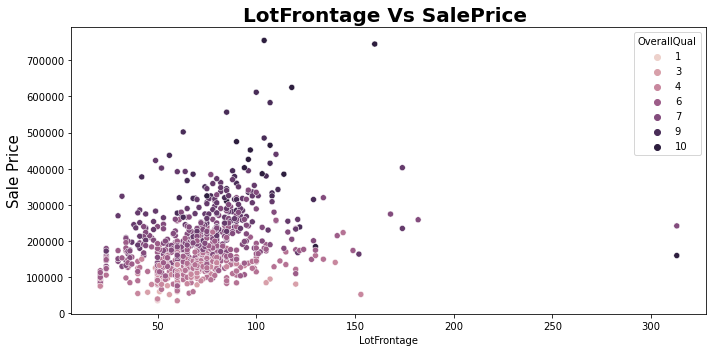

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'], hue= train["OverallQual"])
plt.title("LotFrontage Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

Observations:
LotFrontage: Linear feet of street connected to property

1.avg LotFrontage is around 50-80
2.A lot of outliers are presnt.
3.There is No Significant relationship found between SalePrice & LotFrontage.

### For LotArea:

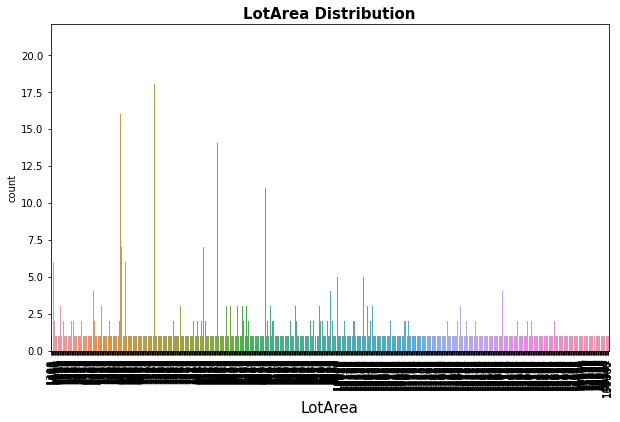

In [59]:
plt.subplots(figsize=(10,6))
sns.countplot('LotArea',data=train)
plt.title('LotArea Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('LotArea',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

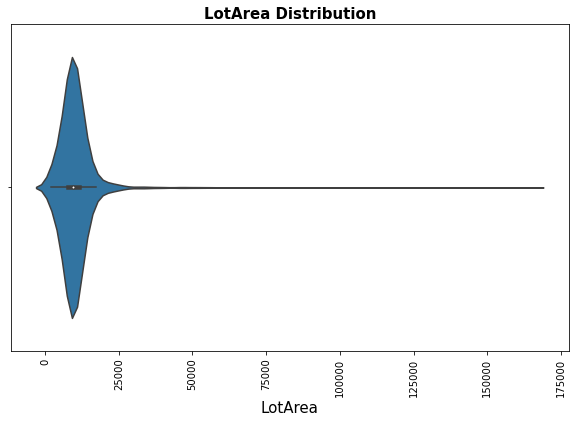

In [60]:
plt.subplots(figsize=(10,6))
sns.violinplot(train.LotArea,data=train)
plt.title('LotArea Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('LotArea',fontsize=15)
plt.xticks(rotation= 90)
plt.show()


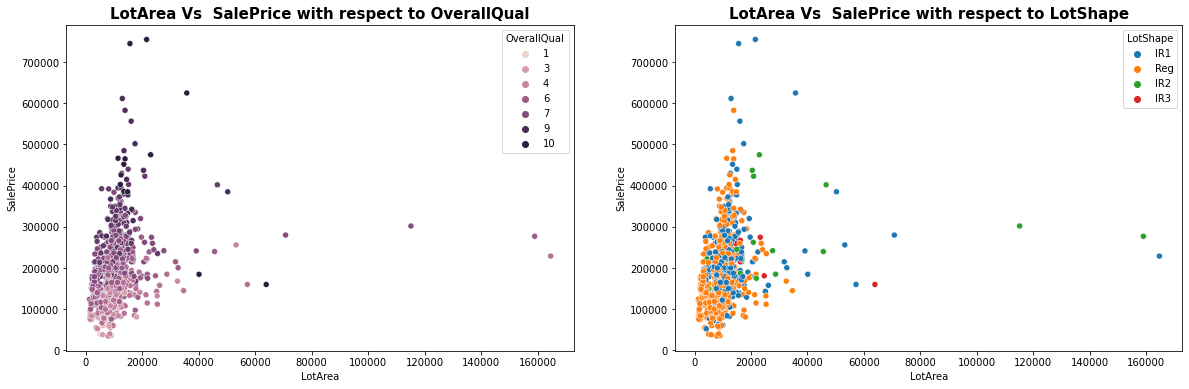

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.scatterplot(x=train['LotArea'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LotArea Vs  SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')
sns.scatterplot(x=train['LotArea'], y=train['SalePrice'], hue= train["LotShape"],ax=ax[1])
ax[1].set_title('LotArea Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### For LotShape:

In [62]:
train["LotShape"].value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

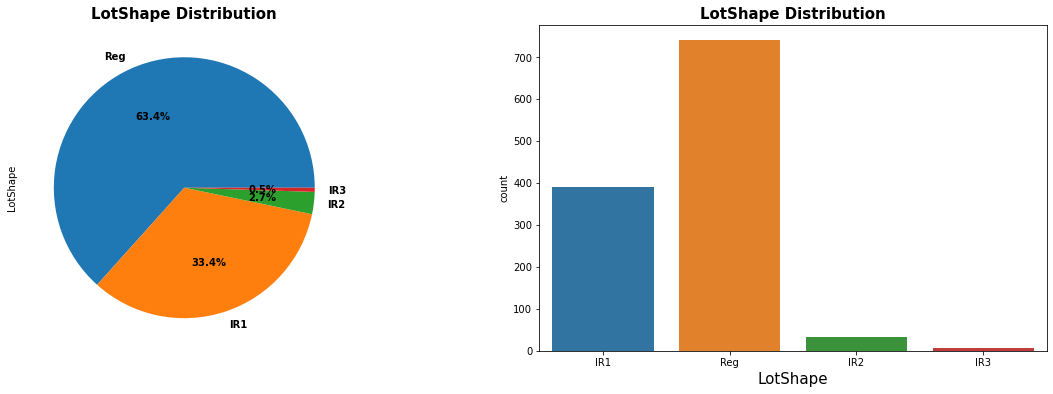

In [63]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LotShape'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LotShape Distribution', fontsize=15,fontweight ='bold')
sns.countplot('LotShape',data=train,ax=ax[1])
ax[1].set_title('LotShape Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('LotShape',fontsize=15)
plt.show()

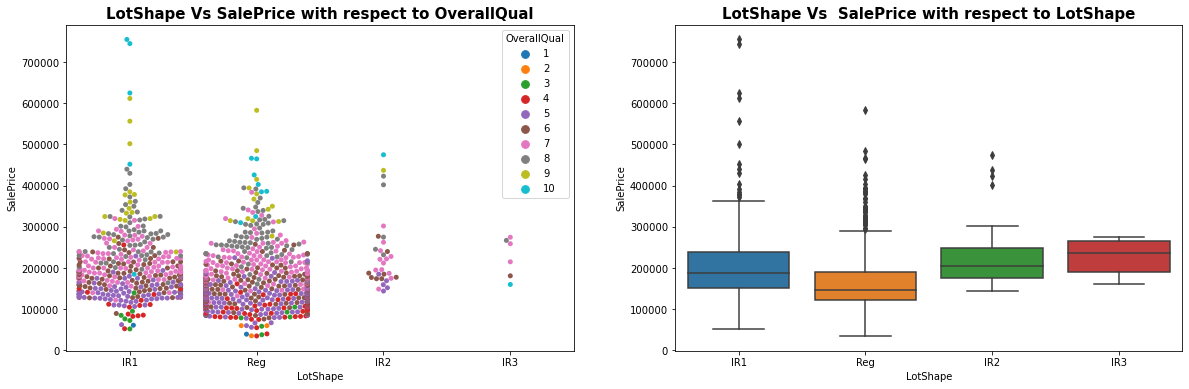

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.swarmplot(x=train['LotShape'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LotShape Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LotShape'], y=train['SalePrice'],ax=ax[1])
ax[1].set_title('LotShape Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

LotShape: General shape of property

   Reg  Regular 
   IR1  Slightly irregular
   IR2  Moderately Irregular
   IR3  Irregular


Min LotShape is Irregular.
63.4% LotShape is Regular followed by Slightly irregular and there is some outliers also with very high price range
There is no relationship between LotShape and selling price

### For LandContour:

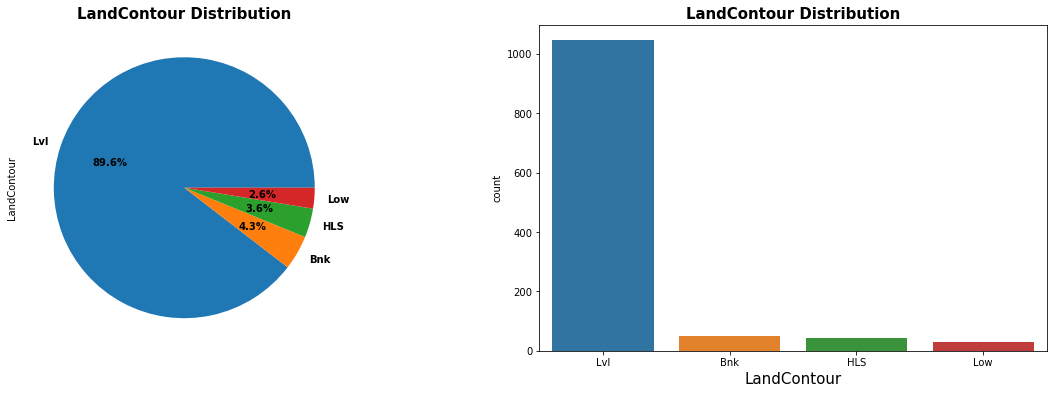

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LandContour'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LandContour Distribution', fontsize=15,fontweight ='bold')
sns.countplot('LandContour',data=train,ax=ax[1])
ax[1].set_title('LandContour Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('LandContour',fontsize=15)
plt.show()

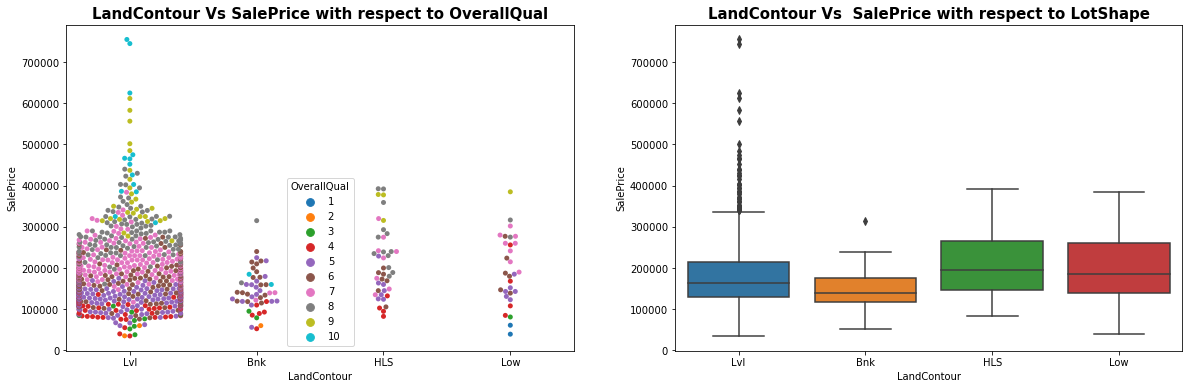

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.swarmplot(x=train['LandContour'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LandContour Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LandContour'], y=train['SalePrice'],ax=ax[1])
ax[1].set_title('LandContour Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### for LotConfig:

In [67]:
train["LotConfig"].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

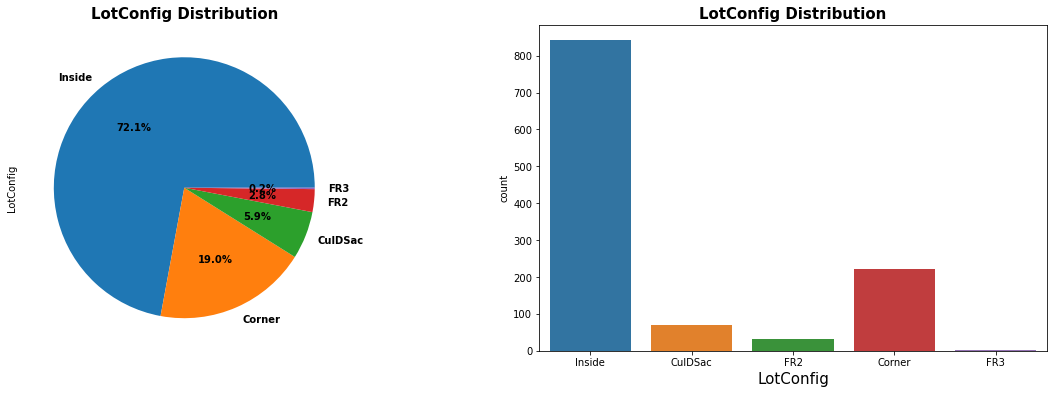

In [68]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LotConfig'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LotConfig Distribution', fontsize=15,fontweight ='bold')
sns.countplot('LotConfig',data=train,ax=ax[1])
ax[1].set_title('LotConfig Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('LotConfig',fontsize=15)
plt.show()

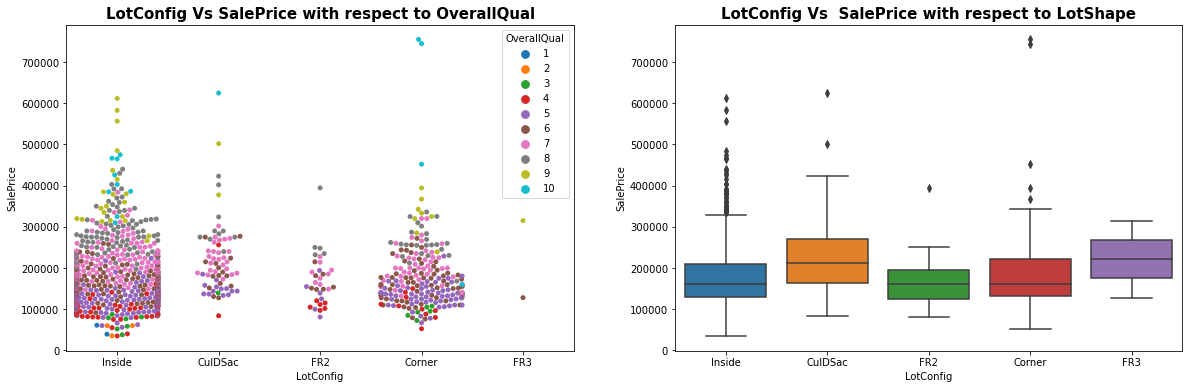

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.swarmplot(x=train['LotConfig'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LotConfig Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LotConfig'], y=train['SalePrice'],ax=ax[1])
ax[1].set_title('LotConfig Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()


LotConfig: Lot configuration

   Inside   Inside lot
   Corner   Corner lot
   CulDSac  Cul-de-sac
   FR2  Frontage on 2 sides of property
   FR3  Frontage on 3 sides of property

1.72.1% of house comes with inside Lot configuration.
2.Cheapest property are in Inside lot configuration.
3.Only 2 are in Frontage on 3 sides of property.

### For LandSlope, and Neighborhood :

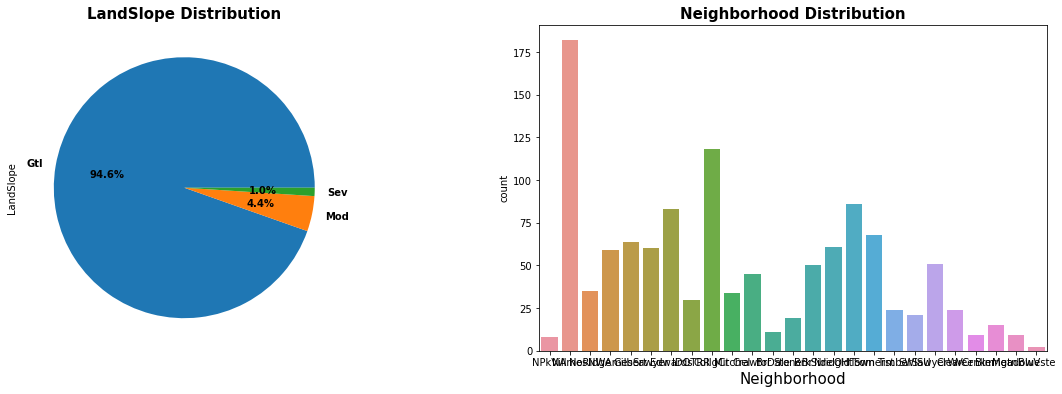

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LandSlope'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LandSlope Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Neighborhood',data=train,ax=ax[1])
ax[1].set_title('Neighborhood Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('Neighborhood',fontsize=15)
plt.show()

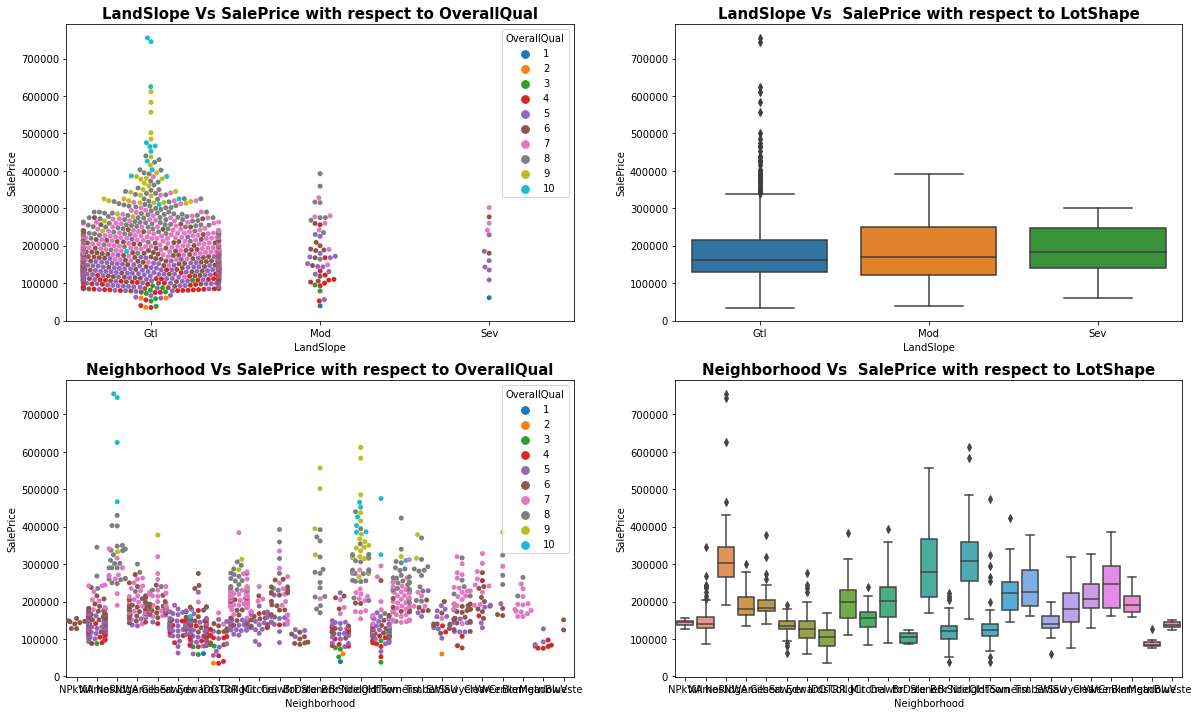

In [71]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['LandSlope'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('LandSlope Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LandSlope'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('LandSlope Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.swarmplot(x=train['Neighborhood'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('Neighborhood Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['Neighborhood'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('Neighborhood Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

Neighborhood: Physical locations within Ames city limits

   Blmngtn  Bloomington Heights
   Blueste  Bluestem
   BrDale   Briardale
   BrkSide  Brookside
   ClearCr  Clear Creek
   CollgCr  College Creek
   Crawfor  Crawford
   Edwards  Edwards
   Gilbert  Gilbert
   IDOTRR   Iowa DOT and Rail Road
   MeadowV  Meadow Village
   Mitchel  Mitchell
   Names    North Ames
   NoRidge  Northridge
   NPkVill  Northpark Villa
   NridgHt  Northridge Heights
   NWAmes   Northwest Ames
   OldTown  Old Town
   SWISU    South & West of Iowa State University
   Sawyer   Sawyer
   SawyerW  Sawyer West
   Somerst  Somerset
   StoneBr  Stone Brook
   Timber   Timberland
   Veenker  Veenker

95% LandSlope is Gentle slope.
1% properties come with severe

### For Condition1, and Condition2 :

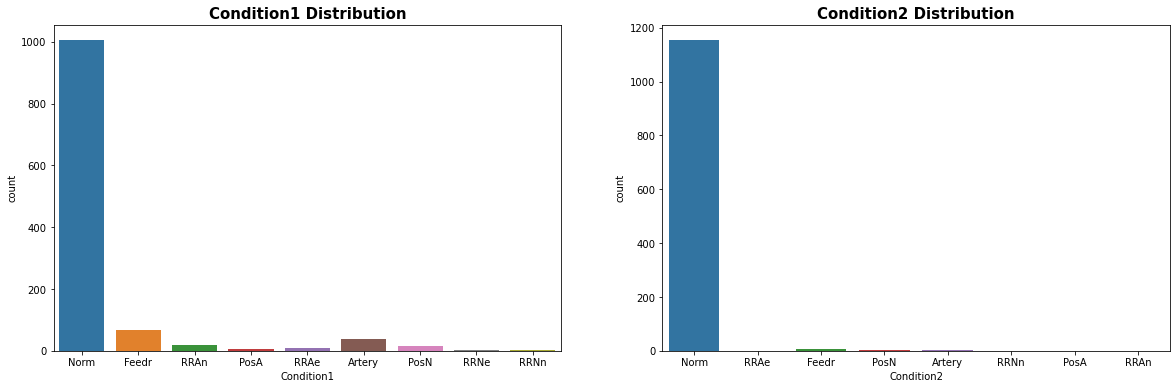

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.countplot('Condition1',data=train,ax=ax[0])
ax[0].set_title('Condition1 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Condition2',data=train,ax=ax[1])
ax[1].set_title('Condition2 Distribution',fontsize=15,fontweight ='bold')
plt.show()


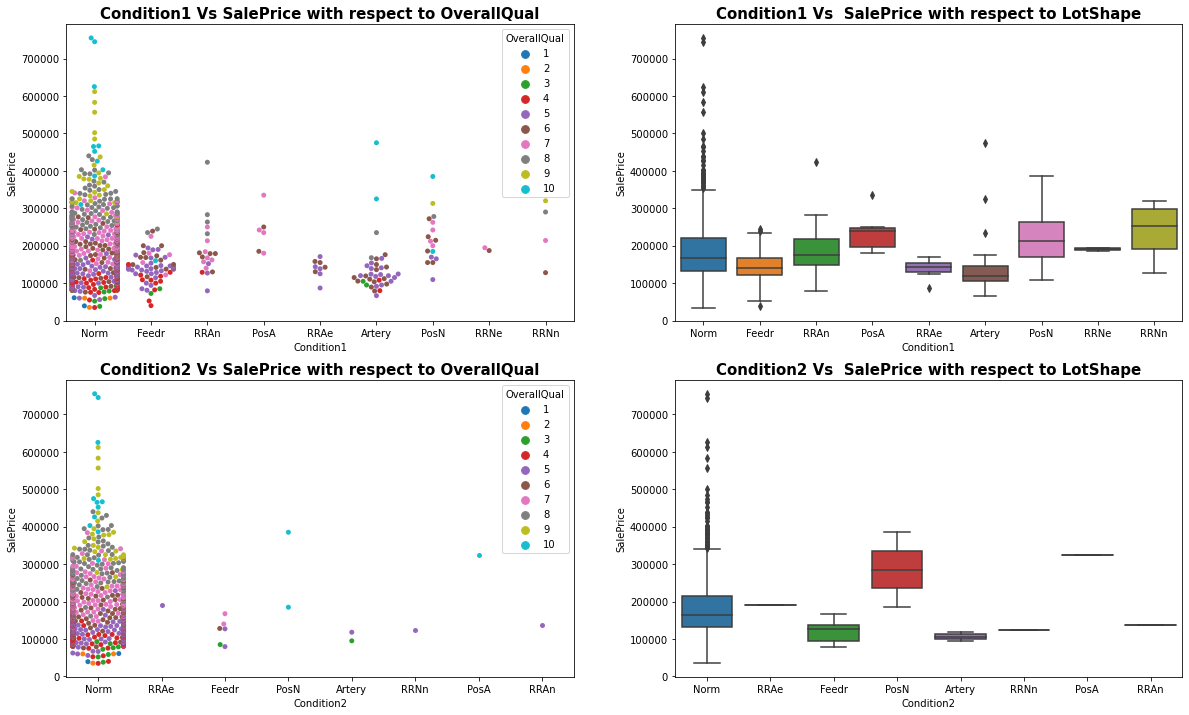

In [73]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['Condition1'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('Condition1 Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['Condition1'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('Condition1 Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.swarmplot(x=train['Condition2'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('Condition2 Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['Condition2'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('Condition2 Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

In [74]:
train["Condition1"].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [75]:
train["Condition2"].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [76]:
train.drop(["Condition1", "Condition2"], axis=1, inplace= True)

### For BldgType and HouseStyle :

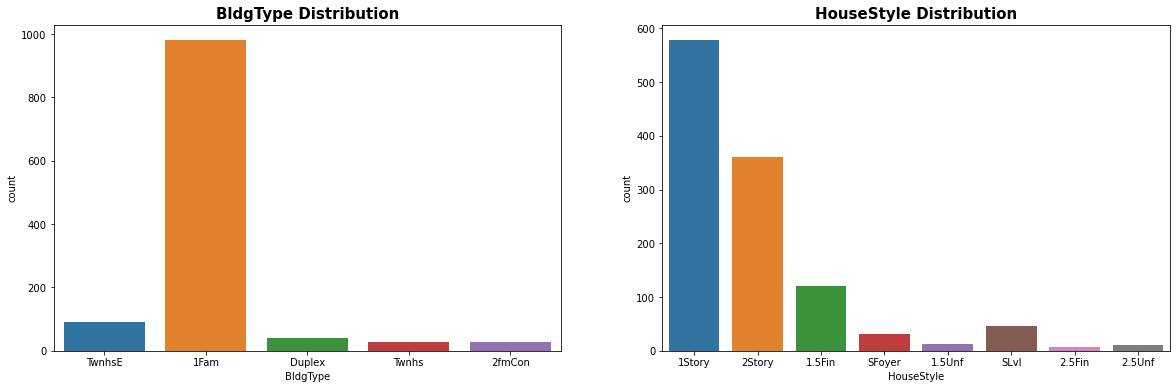

In [77]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.countplot('BldgType',data=train,ax=ax[0])
ax[0].set_title('BldgType Distribution', fontsize=15,fontweight ='bold')
sns.countplot('HouseStyle',data=train,ax=ax[1])
ax[1].set_title('HouseStyle Distribution',fontsize=15,fontweight ='bold')
plt.show()

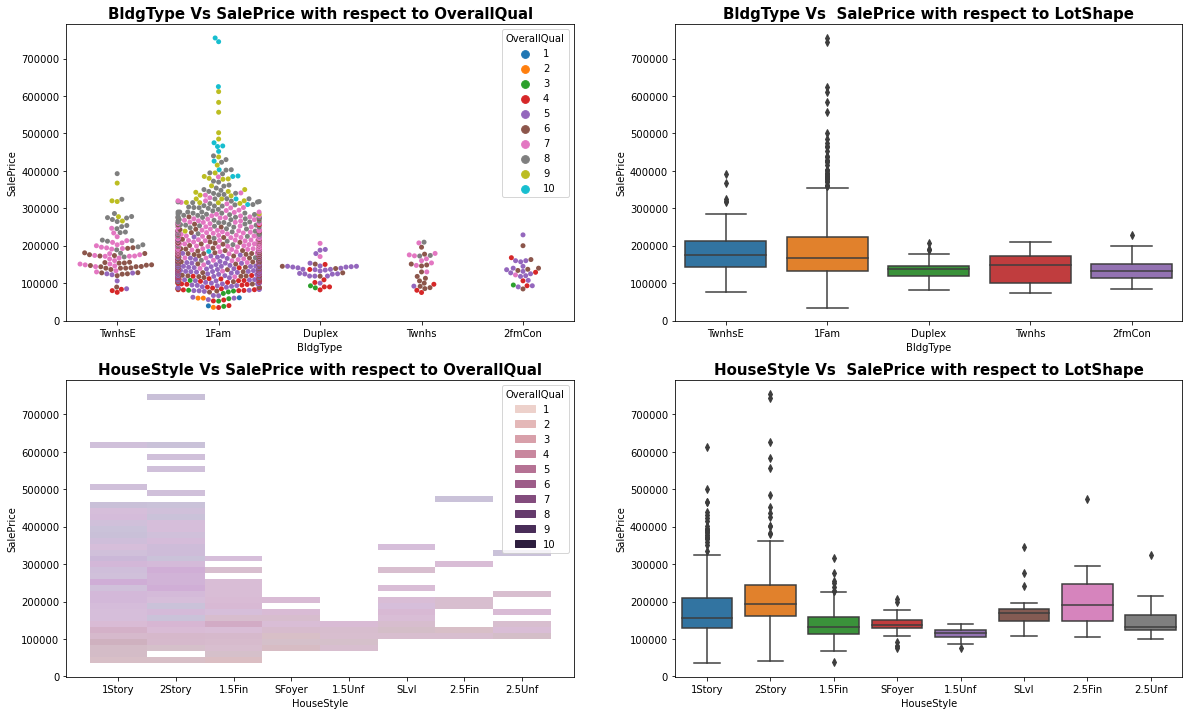

In [78]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['BldgType'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('BldgType Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['BldgType'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('BldgType Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.histplot(x=train['HouseStyle'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('HouseStyle Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['HouseStyle'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('HouseStyle Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

BldgType: Type of dwelling

   1Fam     Single-family Detached  
   2FmCon   Two-family Conversion; originally built as one-family dwelling
   Duplx    Duplex
   TwnhsE   Townhouse End Unit
   TwnhsI   Townhouse Inside Unit

HouseStyle: Style of dwelling

   1Story   One story
   1.5Fin   One and one-half story: 2nd level finished
   1.5Unf   One and one-half story: 2nd level unfinished
   2Story   Two story
   2.5Fin   Two and one-half story: 2nd level finished
   2.5Unf   Two and one-half story: 2nd level unfinished
   SFoyer   Split Foyer
   SLvl Split Level


1.Around 1000 house properties are with building type Single-family Detached.
2.More than 550 House Properties are with building type one story.
3.Two story building is costlier than another.

### For 'OverallQual' and 'OverallCond':

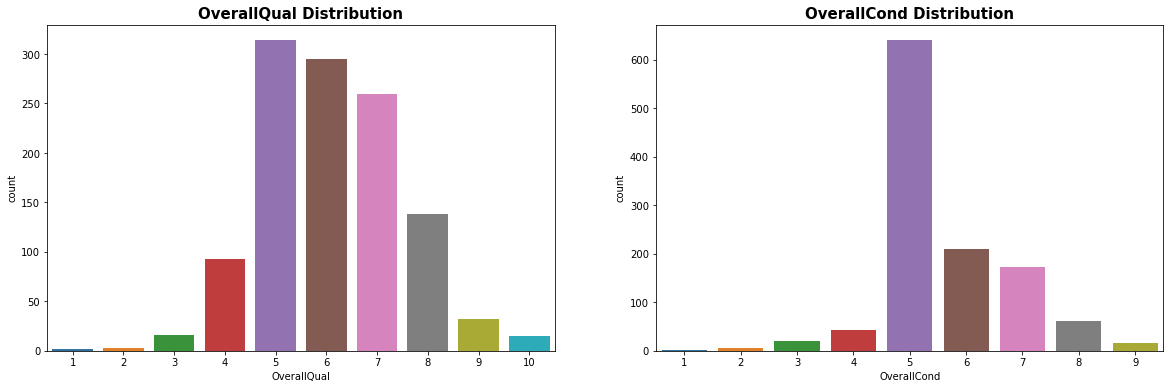

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.countplot('OverallQual',data=train,ax=ax[0])
ax[0].set_title('OverallQual Distribution', fontsize=15,fontweight ='bold')
sns.countplot('OverallCond',data=train,ax=ax[1])
ax[1].set_title('OverallCond Distribution',fontsize=15,fontweight ='bold')
plt.show()

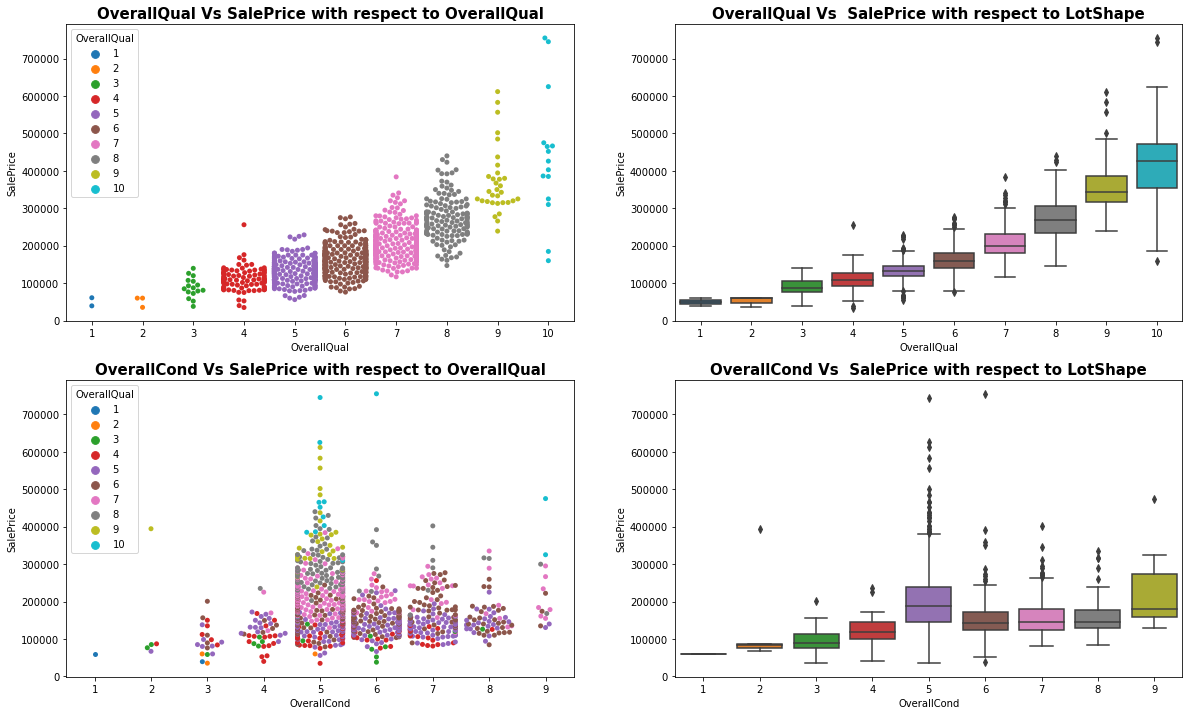

In [80]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['OverallQual'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('OverallQual Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['OverallQual'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('OverallQual Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.swarmplot(x=train['OverallCond'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('OverallCond Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['OverallCond'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('OverallCond Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()


### For 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation':

In [81]:
set1= ['RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType',  'ExterQual',
       'ExterCond', 'Foundation']

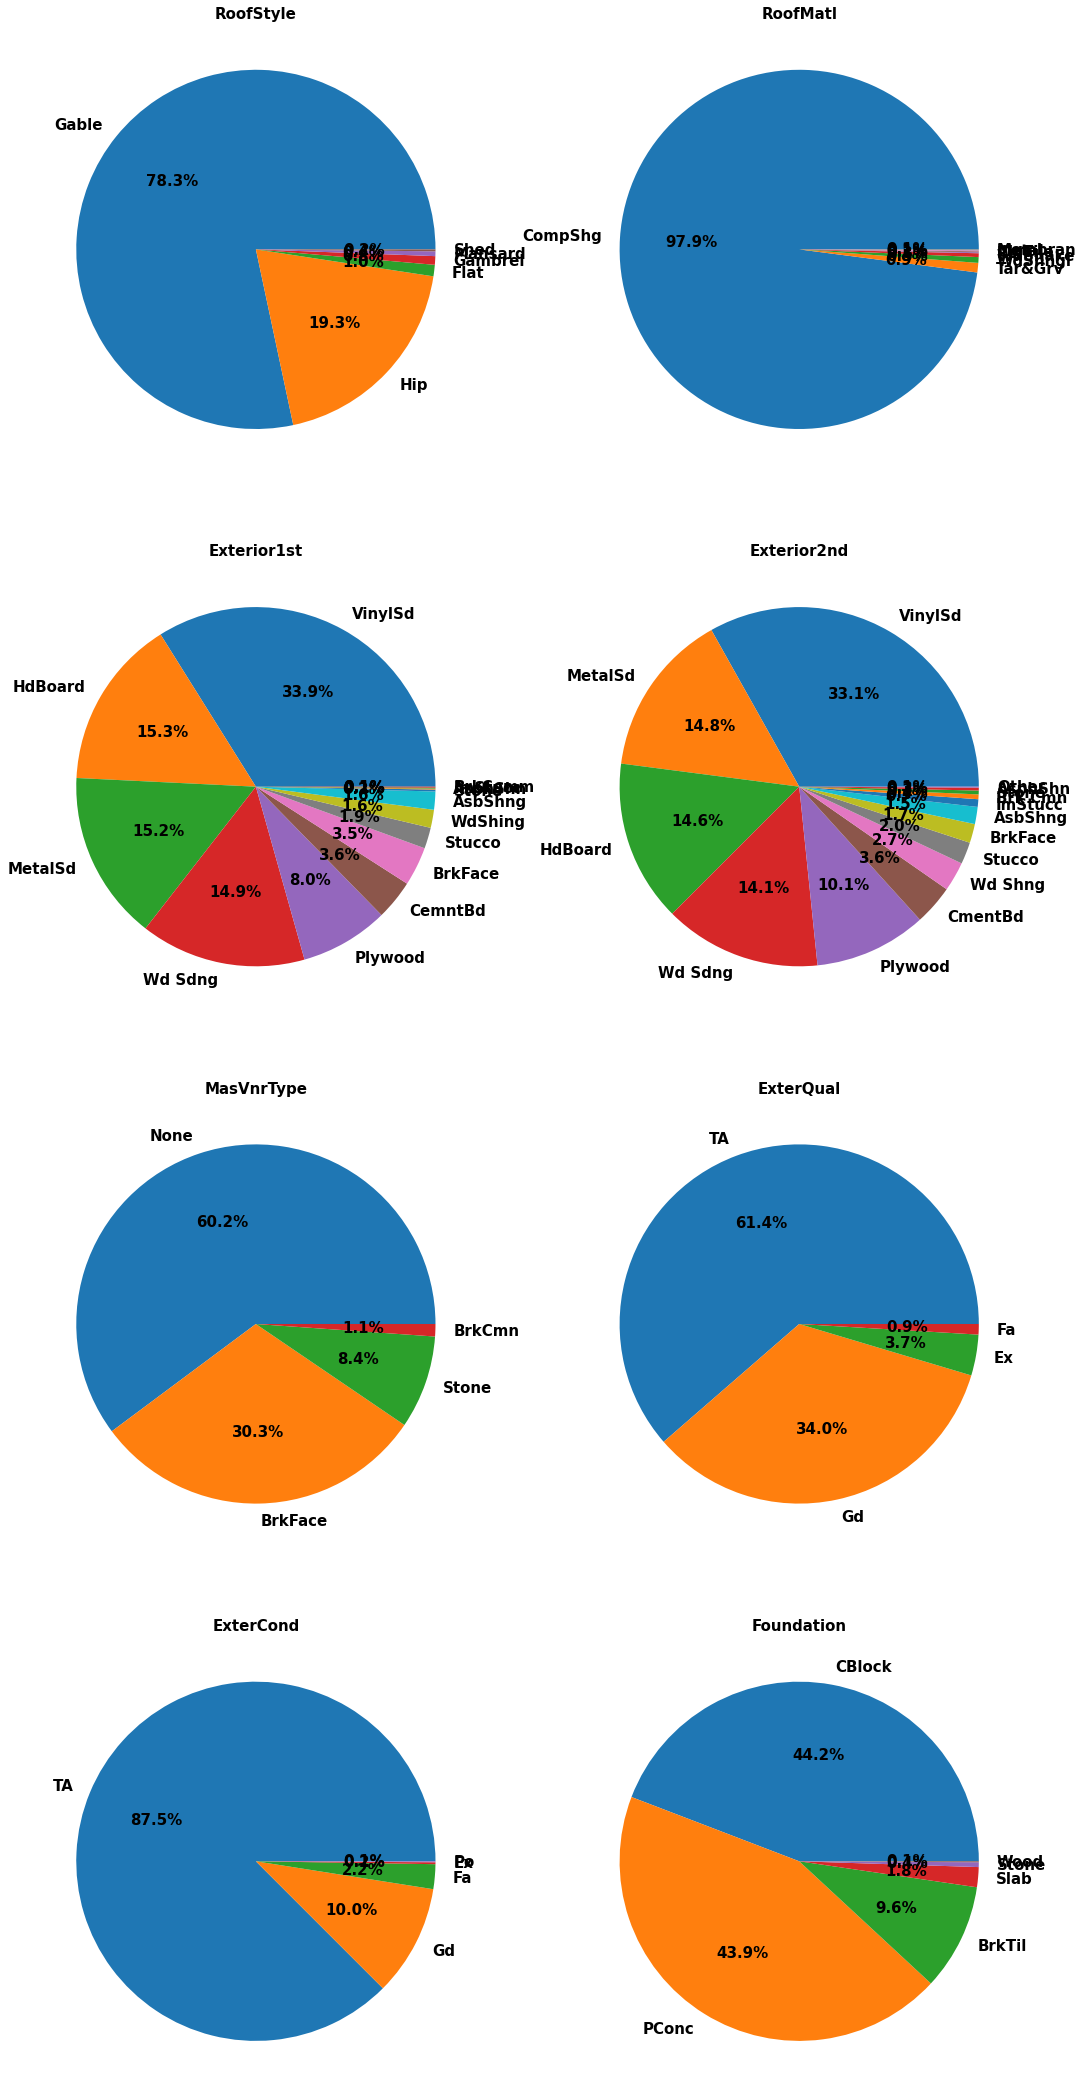

In [82]:
plt.figure(figsize=(15,30))
pltno =1
for i in set1:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        train[i].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':15})
        plt.title(i,fontsize=15,fontweight ='bold')
        plt.ylabel(' ')
    pltno+=1 
plt.tight_layout()
plt.show()

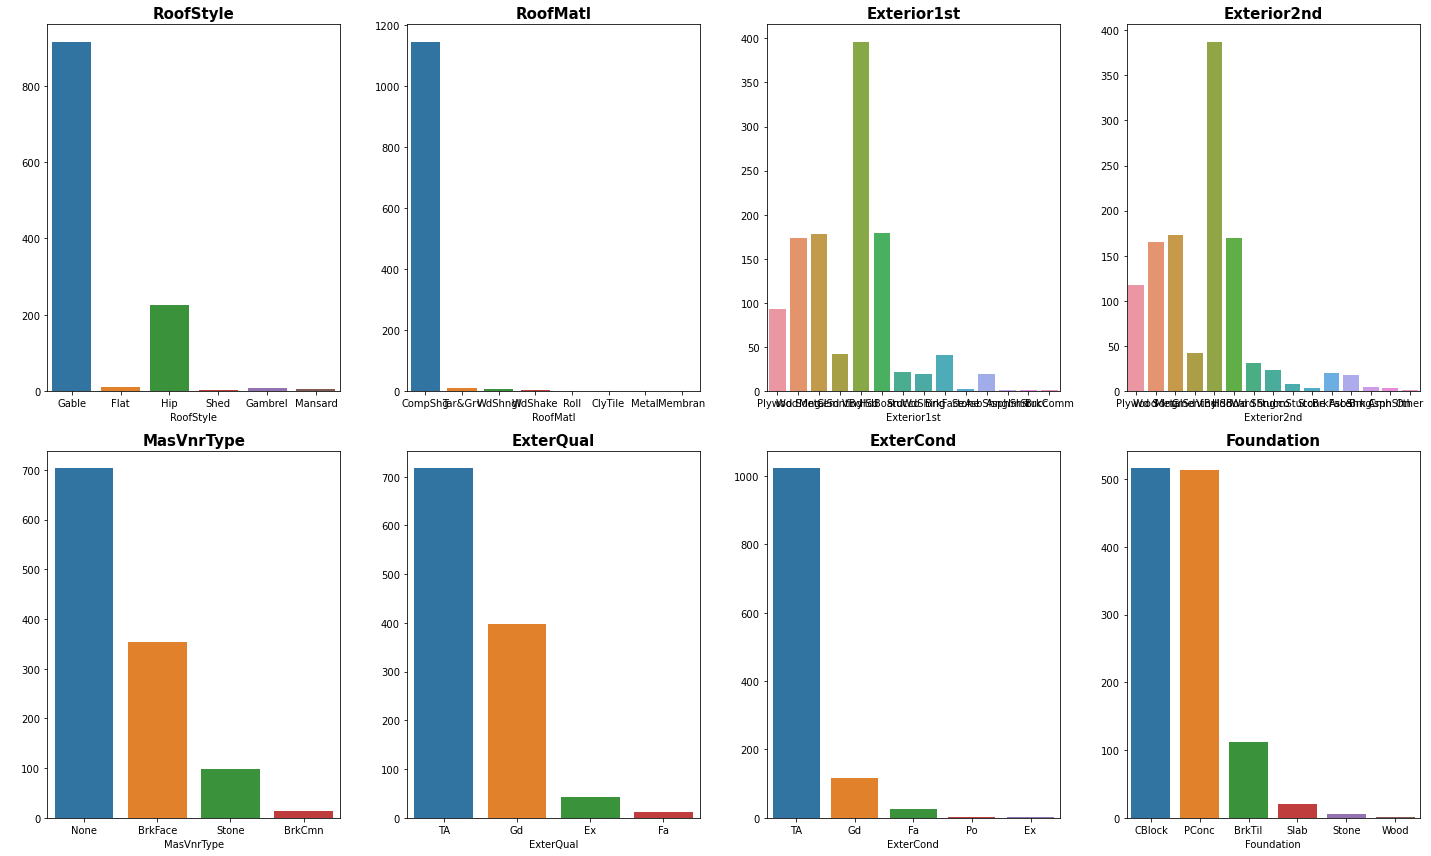

In [83]:
plt.figure(figsize=(20,12))
pltno =1
for i in set1:
    if pltno <=8:
        ax = plt.subplot(2,4,pltno)
        sns.countplot(train[i])
        plt.title(i,fontsize=15,fontweight ='bold')
        plt.ylabel(' ')
    pltno+=1 
plt.tight_layout()
plt.show()

RoofStyle: Type of roof

   Flat Flat
   Gable    Gable
   Gambrel  Gabrel (Barn)
   Hip  Hip
   Mansard  Mansard
   Shed Shed

RoofMatl: Roof material

   ClyTile  Clay or Tile
   CompShg  Standard (Composite) Shingle
   Membran  Membrane
   Metal    Metal
   Roll Roll
   Tar&Grv  Gravel & Tar
   WdShake  Wood Shakes
   WdShngl  Wood Shingles

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

   AsbShng  Asbestos Shingles
   AsphShn  Asphalt Shingles
   BrkComm  Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   CemntBd  Cement Board
    ImStucc  Imitation Stucco
   MetalSd  Metal Siding
   Other    Other
   Plywood  Plywood
   PreCast  PreCast 
   Stone    Stone
   Stucco   Stucco
   VinylSd  Vinyl Siding
   Wd Sdng  Wood Siding
   WdShing  Wood Shingles

MasVnrType: Masonry veneer type

   BrkCmn   Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   None     None
   Stone    Stone

ExterQual: Evaluates the quality of the material on the exterior

   Ex   Excellent
   Gd   Good
    TA   Average/Typical
   Fa   Fair
   Po   Poor

ExterCond: Evaluates the present condition of the material on the exterior

   Ex   Excellent
   Gd   Good
   TA   Average/Typical
   Fa   Fair
   Po   Poor

Foundation: Type of foundation

   BrkTil   Brick & Tile
   CBlock   Cinder Block
   PConc    Poured Contrete 
   Slab     Slab
   Stone    Stone
   Wood     Wood
    1.78.3% house is with Gable RoofStyle followed by 19.3 % house is with Hip Style.
2.98% material is Standard (Composite) Shingle and other 7 types are only 2% togetherly.
3.Around 33% material is Vinyl Siding as Exterior covering on house for both Exterior1st and Exterior2nd.
4.Around 60% of house comes with None as Masonry veneer type . Maybe there is some mistake during entry the data.
5.Around 60% of house comes with Average quality of the material on the exterior.
6.87.5% of house comes with Average/Typical as the present condition of the material on the exterior.
7.Around 44% of house comes with both Cinder Block and Poured Contrete both Type of foundation.

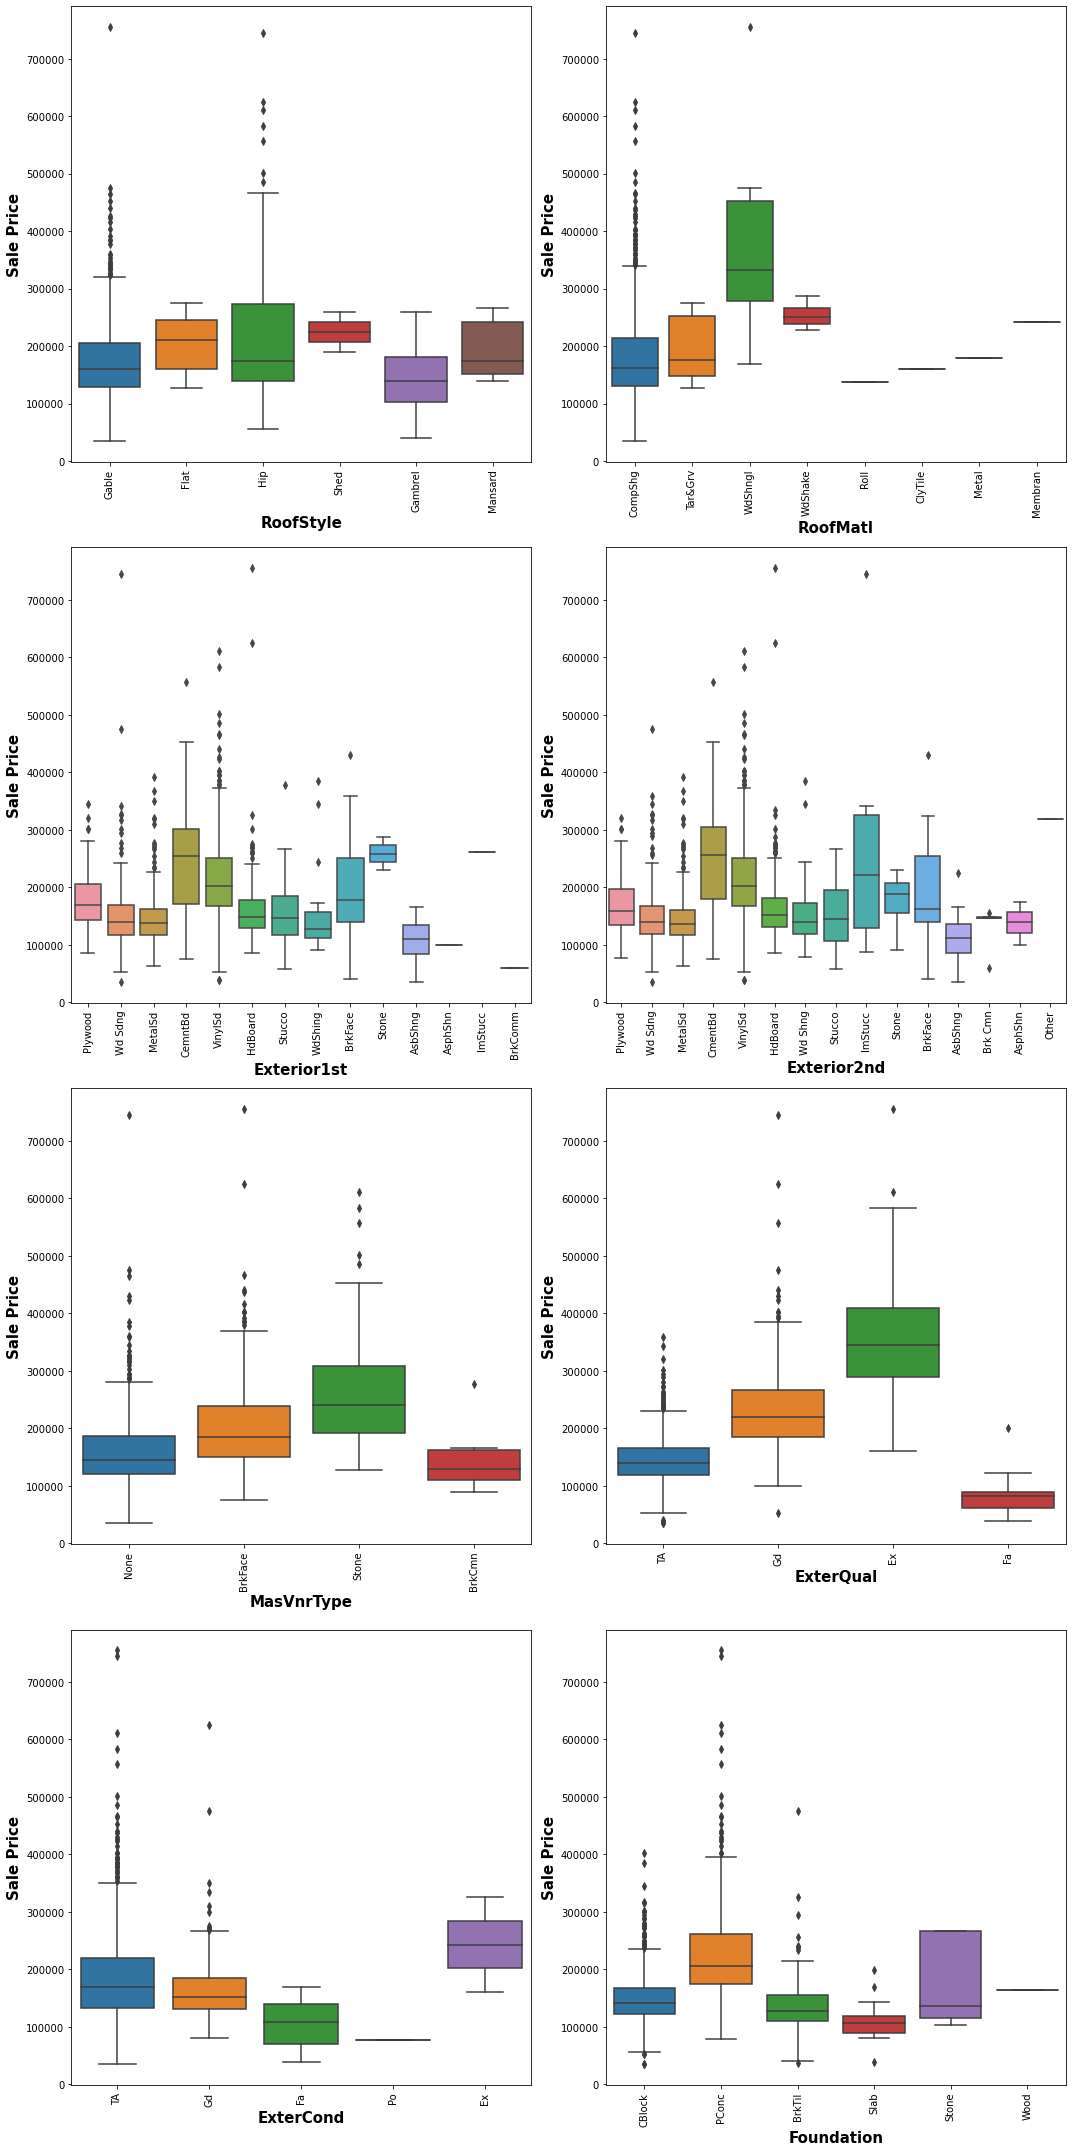

In [84]:
plt.figure(figsize=(15,30))
pltno =1
for i in set1:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        sns.boxplot(x= train[i], y = train['SalePrice'])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()

### For 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'

In [85]:
set2= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir']

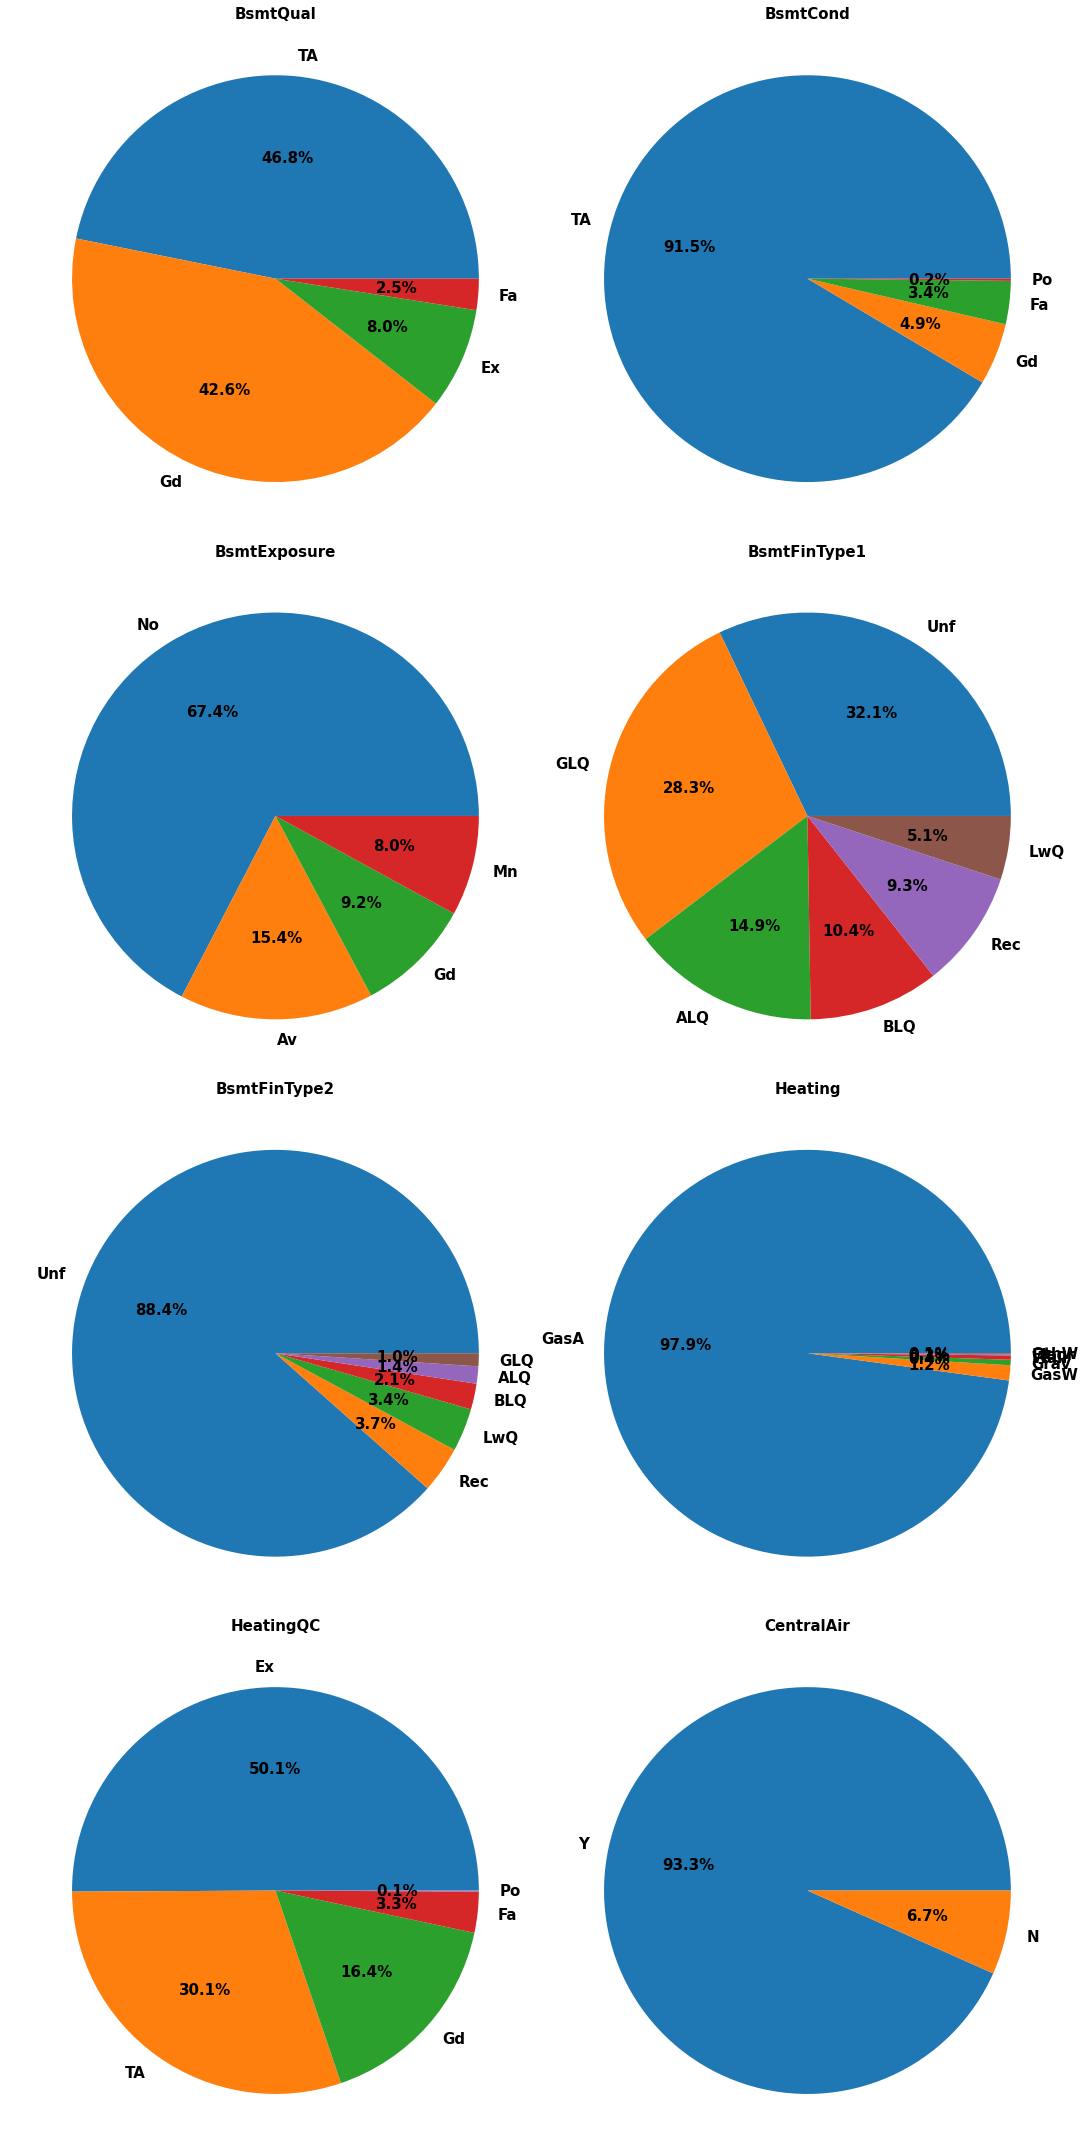

In [86]:
plt.figure(figsize=(15,30))
pltno =1
for i in set2:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        train[i].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':15})
        plt.title(i,fontsize=15,fontweight ='bold')
        plt.ylabel(' ')
    pltno+=1 
plt.tight_layout()
plt.show()


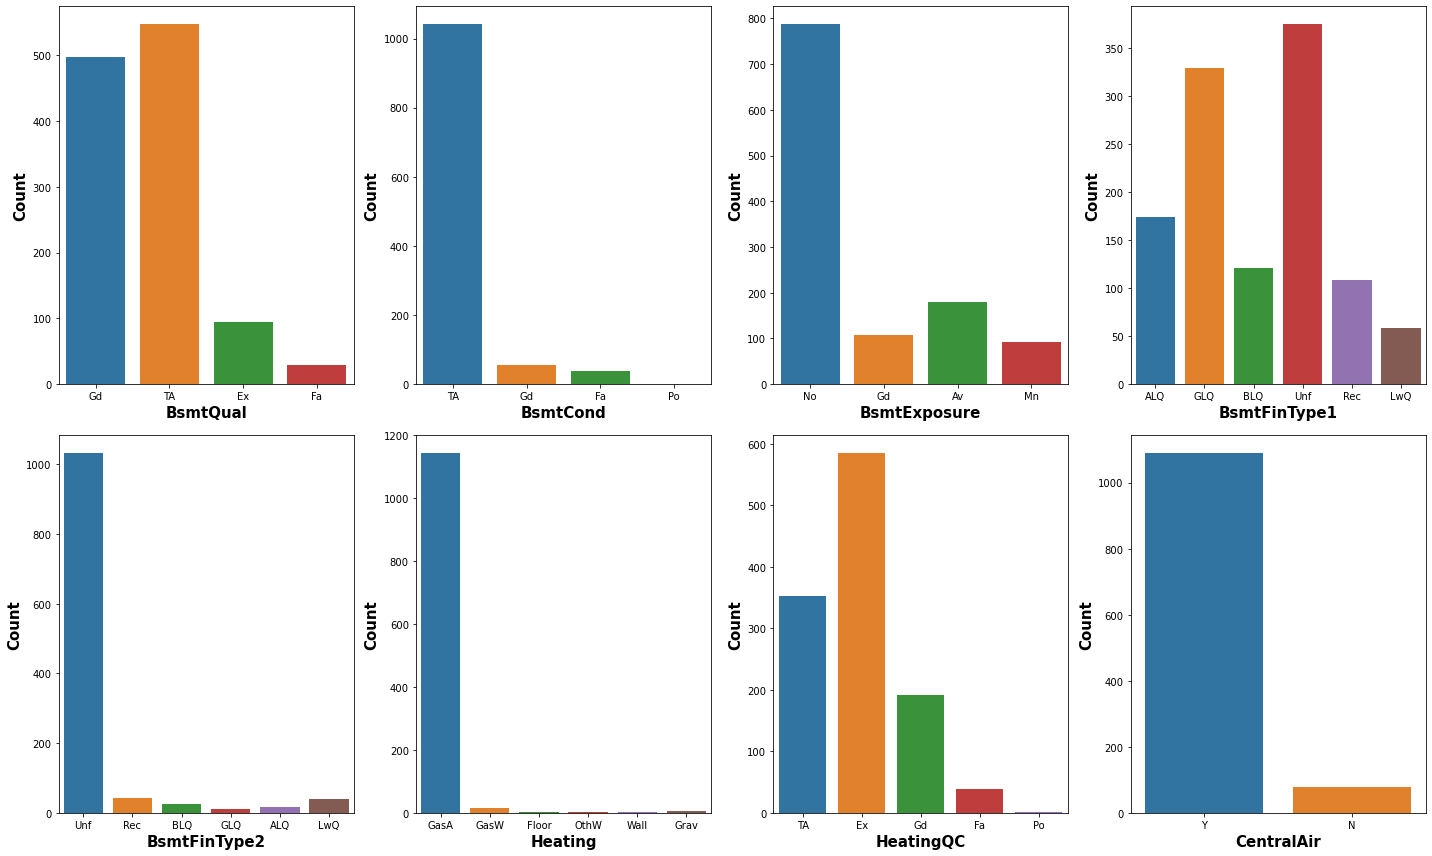

In [87]:
plt.figure(figsize=(20,12))
pltno =1
for i in set2:
    if pltno <=8:
        ax = plt.subplot(2,4,pltno)
        sns.countplot(train[i])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Count', fontsize=15,fontweight ='bold' )
    pltno+=1 
plt.tight_layout()
plt.show()

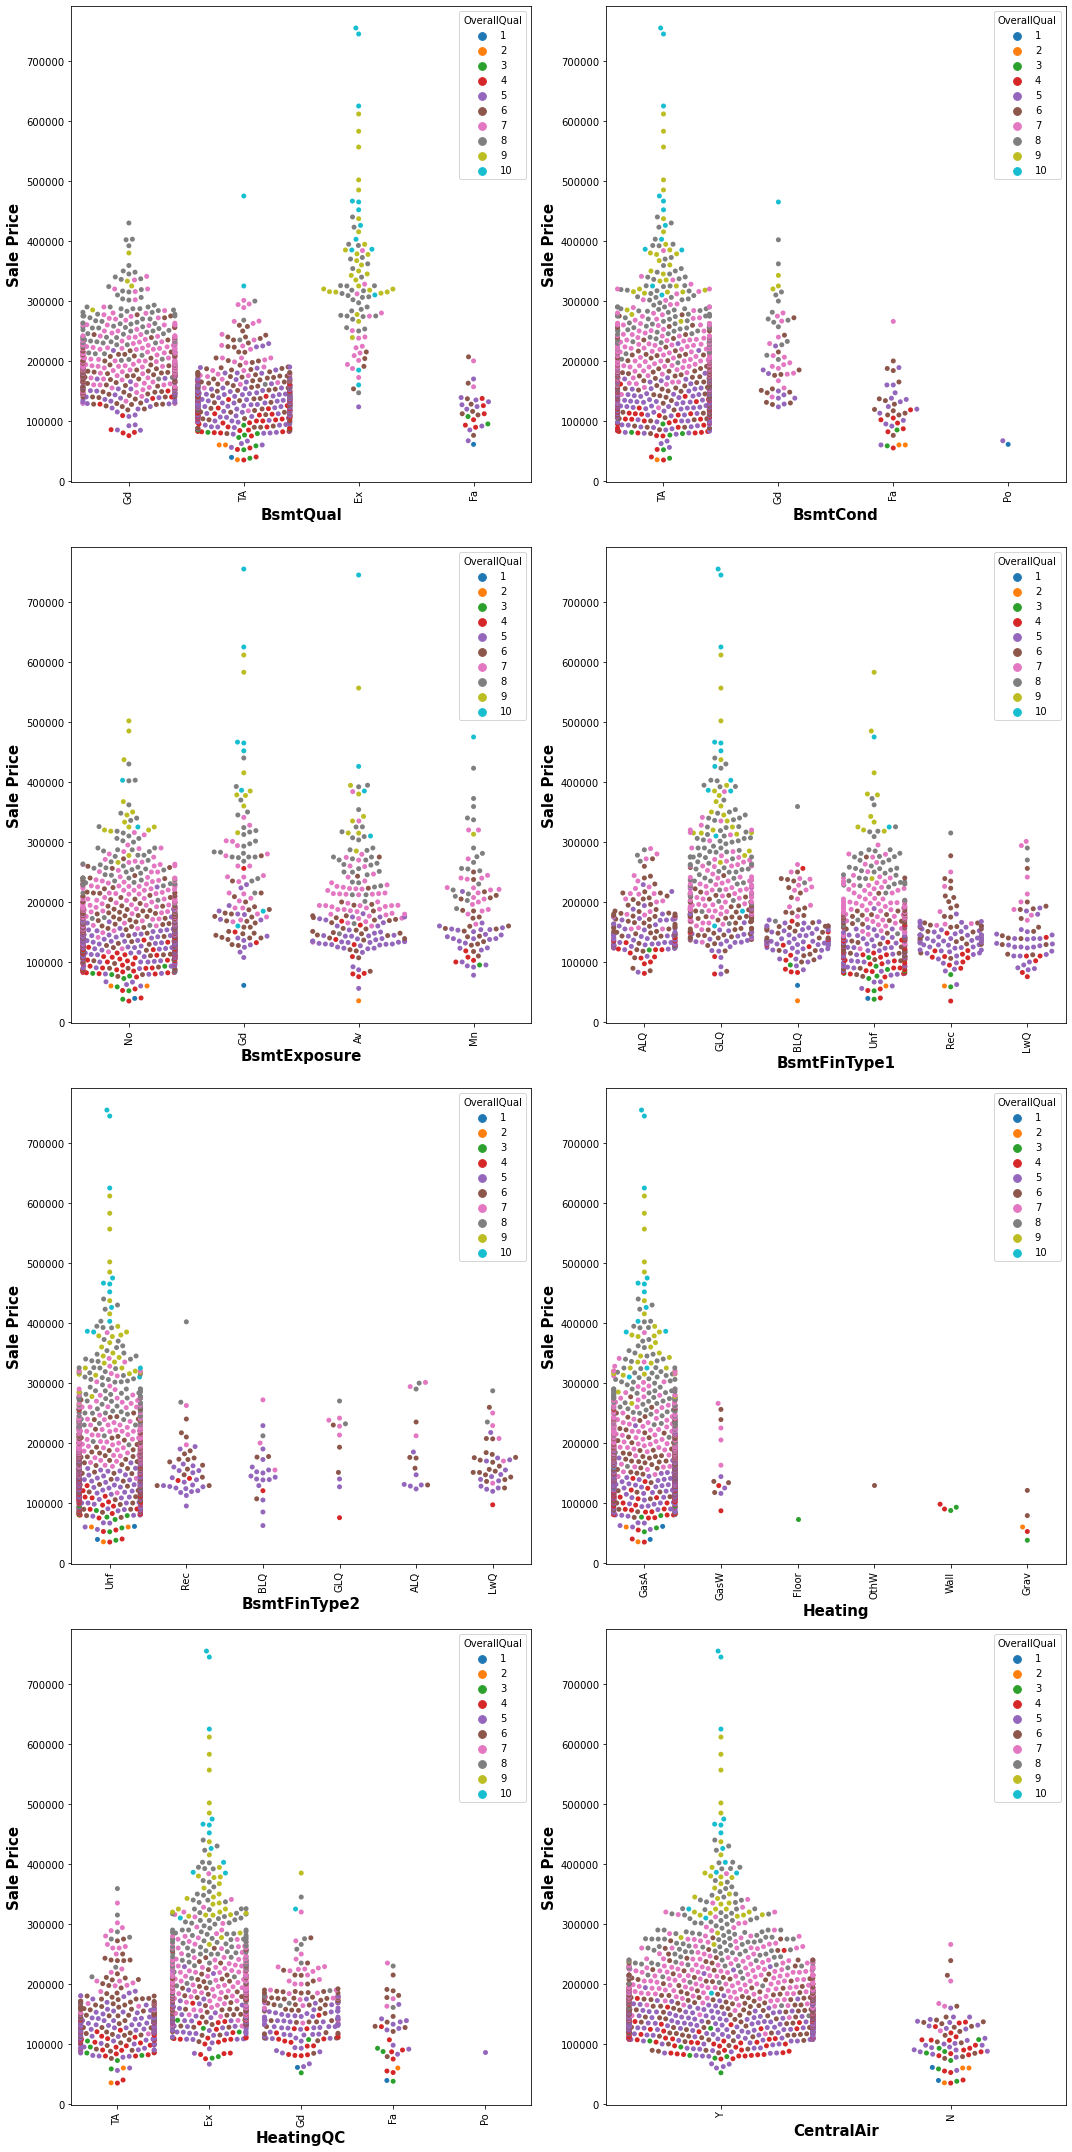

In [88]:
plt.figure(figsize=(15,30))
pltno =1
for i in set2:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        sns.swarmplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()

In [89]:
set3= ['Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType','SaleCondition']

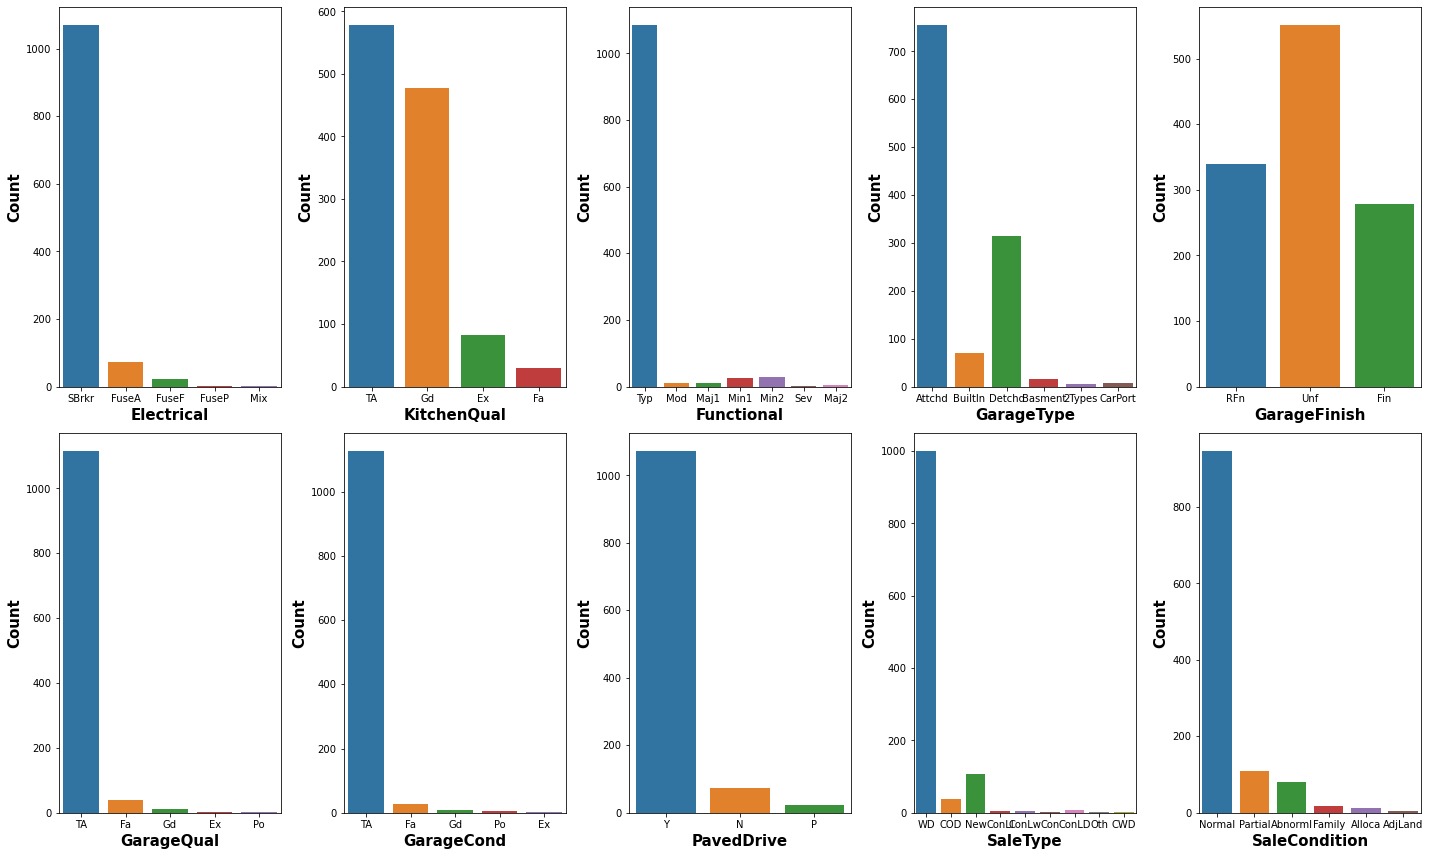

In [90]:
plt.figure(figsize=(20,12))
pltno =1
for i in set3:
    if pltno <=10:
        ax = plt.subplot(2,5,pltno)
        sns.countplot(train[i])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Count', fontsize=15,fontweight ='bold' )
    pltno+=1 
plt.tight_layout()
plt.show()

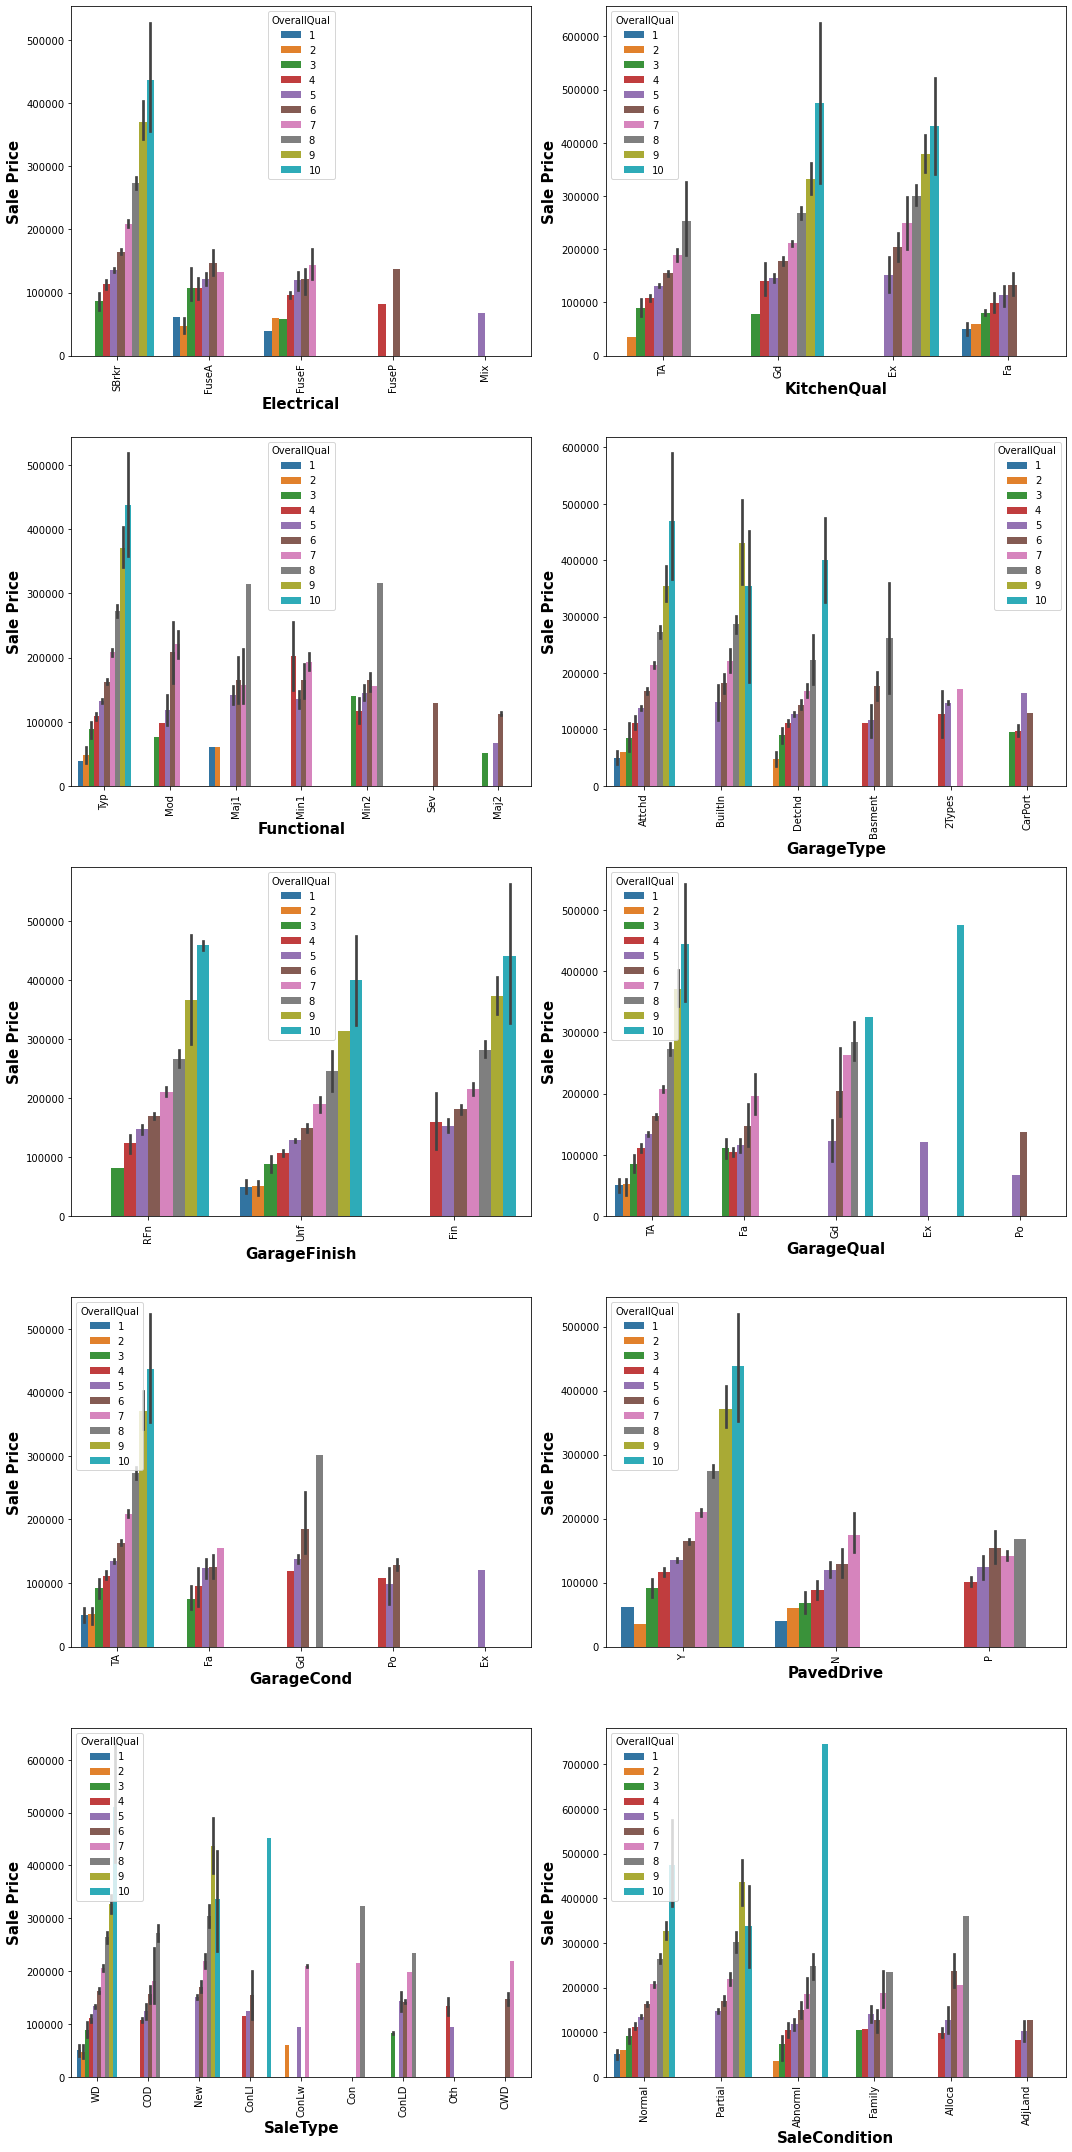

In [91]:
plt.figure(figsize=(15,30))
pltno =1
for i in set3:
    if pltno <=10:
        ax = plt.subplot(5,2,pltno)
        sns.barplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()

### For 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age', 'GarageYrBlt_age':

In [92]:
set4= ['YearBuilt_age', 'YearRemodAdd_age',
       'YrSold_age', 'GarageYrBlt_age']

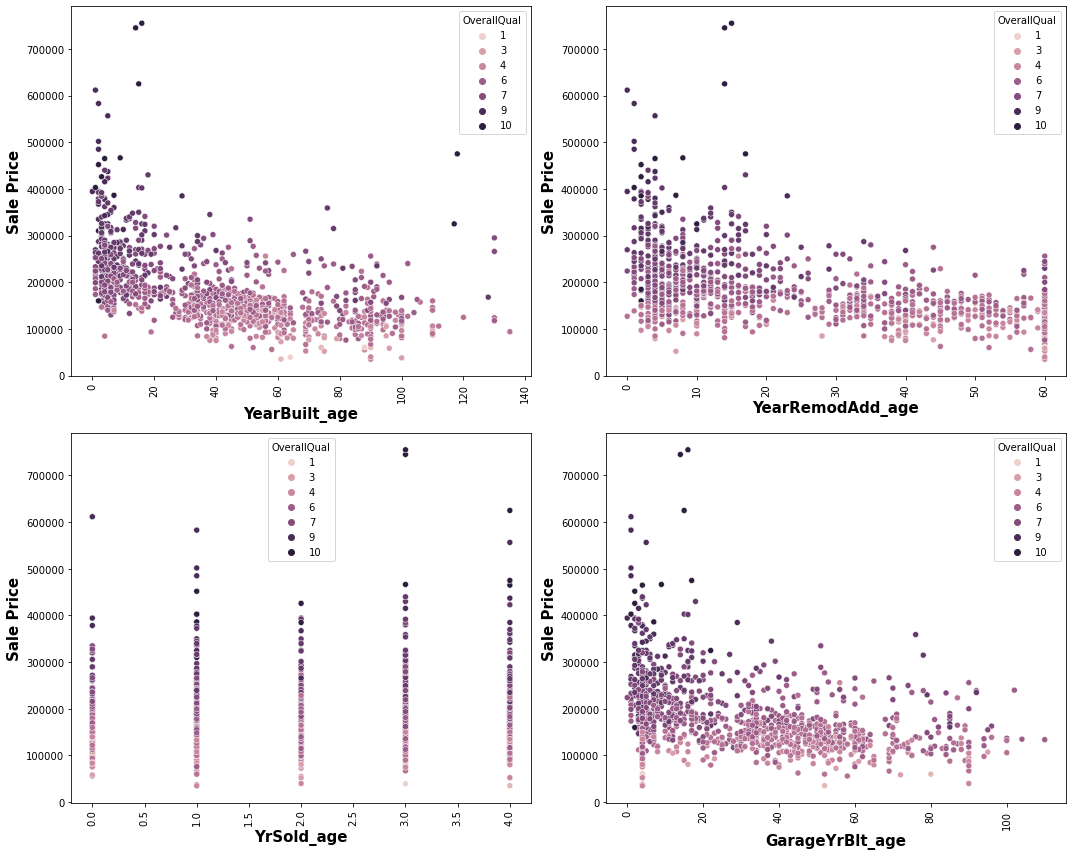

In [93]:
plt.figure(figsize=(15,12))
pltno =1
for i in set4:
    if pltno <=4:
        ax = plt.subplot(2,2,pltno)
        sns.scatterplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()


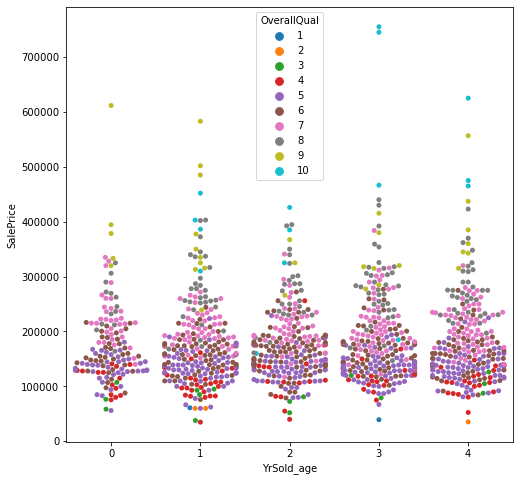

In [94]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['YrSold_age'], y=train['SalePrice'], hue= train["OverallQual"])
plt.show()

### For Target variable SalePrice:

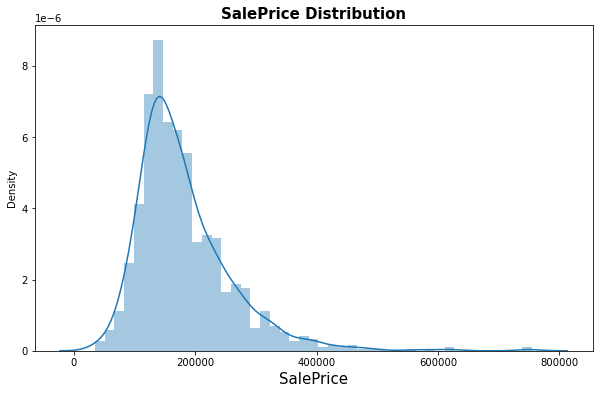

In [95]:
plt.subplots(figsize=(10,6))
sns.distplot(train.SalePrice)
plt.title('SalePrice Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('SalePrice',fontsize=15)
plt.show()

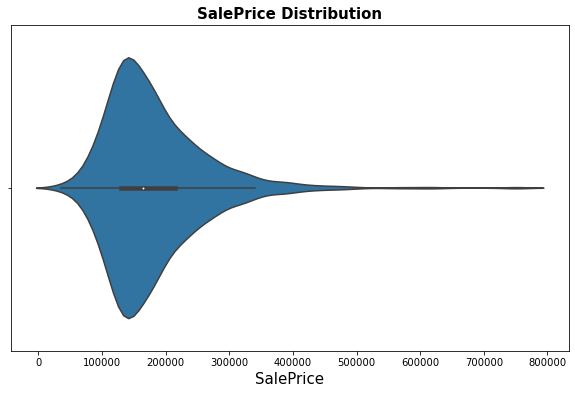

In [96]:
plt.subplots(figsize=(10,6))
sns.violinplot(train.SalePrice, data= train)
plt.title('SalePrice Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('SalePrice',fontsize=15)
plt.show()

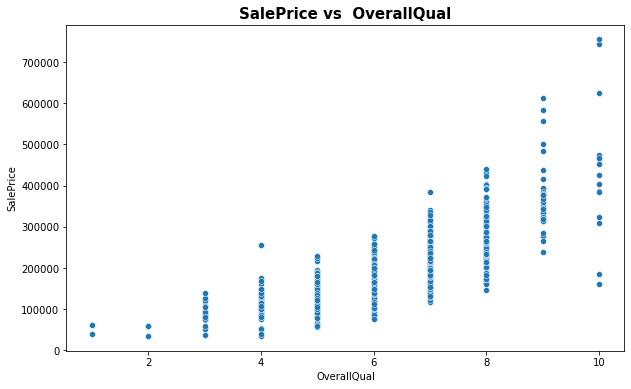

In [97]:
plt.subplots(figsize=(10,6))
sns.scatterplot(y= train.SalePrice, x= train["OverallQual"])
plt.title('SalePrice vs  OverallQual',fontsize=15,fontweight ='bold')
plt.show()


### For 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea','TotalBsmtSF', 'GarageArea', 'PoolArea':

In [98]:
set5= ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GrLivArea','TotalBsmtSF', 'GarageArea', 'PoolArea', 
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']

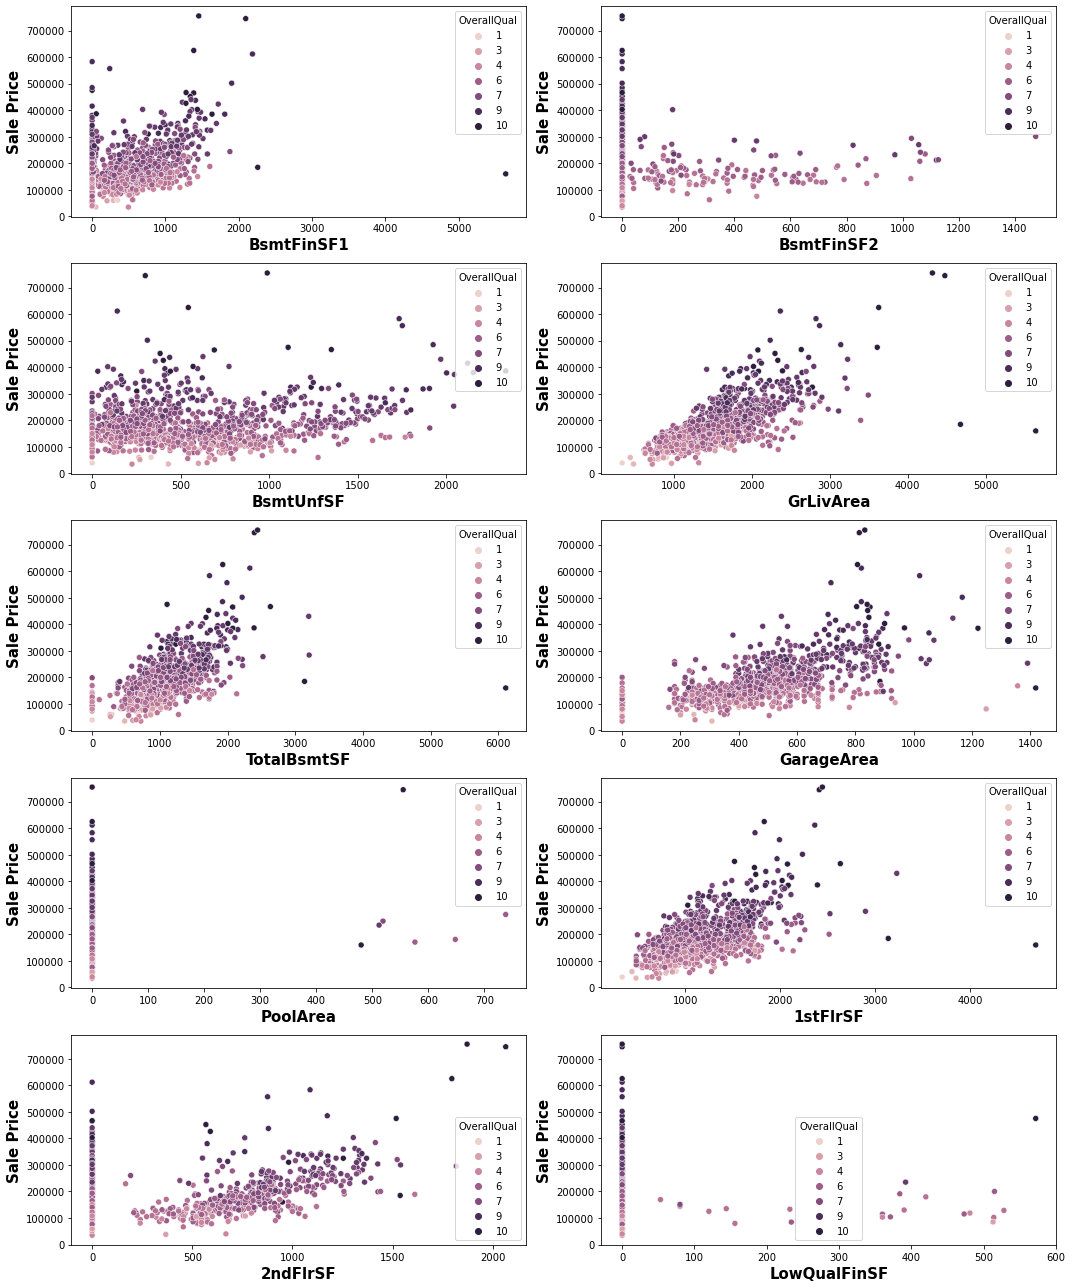

In [99]:
plt.figure(figsize=(15,18))
pltno =1
for i in set5:
    if pltno <=10:
        ax = plt.subplot(5,2,pltno)
        sns.scatterplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
    pltno+=1 
plt.tight_layout()
plt.show()


### correlation:

In [101]:
train.corr().T

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass          1.000000    -0.365220 -0.124151     0.070462    -0.056978   
LotFrontage        -0.365220     1.000000  0.557257     0.247809    -0.053345   
LotArea            -0.124151     0.557257  1.000000     0.107188     0.017513   
OverallQual         0.070462     0.247809  0.107188     1.000000    -0.083167   
OverallCond        -0.056978    -0.053345  0.017513    -0.083167     1.000000   
MasVnrArea          0.028215     0.201003  0.120192     0.403985    -0.135133   
BsmtFinSF1         -0.052236     0.247780  0.221851     0.219643    -0.028810   
BsmtFinSF2         -0.062403     0.002514  0.056656    -0.040893     0.044336   
BsmtUnfSF          -0.134170     0.123943  0.006600     0.308676    -0.146384   
TotalBsmtSF        -0.214042     0.386261  0.259733     0.528285    -0.162481   
1stFlrSF           -0.227927     0.448186  0.312843     0.458758    -0.134420   
2ndFlrSF            0.300366     0.099250  0.059803     0.316624     0.036668   
LowQualFinSF        0.053737     0.007885 -0.001915    -0.039295     0.041877   
GrLivArea           0.086448     0.410414  0.281360     0.599700    -0.065006   
BsmtFullBath        0.004556     0.104255  0.142387     0.101732    -0.039680   
BsmtHalfBath        0.008207     0.001528  0.059282    -0.030702     0.091016   
FullBath            0.140807     0.189321  0.123197     0.548824    -0.171931   
HalfBath            0.168423     0.053168  0.007271     0.296134    -0.052125   
BedroomAbvGr       -0.013283     0.264010  0.117351     0.099639     0.028393   
KitchenAbvGr        0.283506    -0.002890 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd        0.051179     0.351969  0.184546     0.432579    -0.039952   
Fireplaces         -0.035792     0.262076  0.285983     0.390067    -0.013632   
GarageCars         -0.027639     0.276798  0.158313     0.596322    -0.161996   
GarageArea         -0.092408     0.344908  0.195162     0.566782    -0.126021   
WoodDeckSF         -0.022609     0.101751  0.216720     0.227137     0.012290   
OpenPorchSF         0.017468     0.167092  0.093080     0.341030    -0.024899   
EnclosedPorch      -0.004252     0.023118 -0.007446    -0.098374     0.056074   
3SsnPorch          -0.043210     0.059508  0.025794     0.045919     0.040476   
ScreenPorch        -0.013291     0.033111  0.025256     0.059387     0.069463   
PoolArea            0.009583     0.223429  0.097107     0.072247    -0.003603   
MiscVal            -0.023503    -0.004559  0.051679    -0.025786     0.075178   
MoSold             -0.016015     0.025046  0.015141     0.090638     0.005519   
SalePrice          -0.060775     0.341294  0.249499     0.789185    -0.065642   
YearBuilt_age      -0.023988    -0.118554 -0.005506    -0.575800     0.377731   
YearRemodAdd_age   -0.056618    -0.096050 -0.027228    -0.555945    -0.080669   
YrSold_age          0.038595     0.004296  0.035399     0.048759    -0.055517   
GarageYrBlt_age    -0.093390    -0.029570  0.054091    -0.427205     0.303182   

                  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass          0.028215   -0.052236   -0.062403  -0.134170    -0.214042   
LotFrontage         0.201003    0.247780    0.002514   0.123943     0.386261   
LotArea             0.120192    0.221851    0.056656   0.006600     0.259733   
OverallQual         0.403985    0.219643   -0.040893   0.308676     0.528285   
OverallCond        -0.135133   -0.028810    0.044336  -0.146384    -0.162481   
MasVnrArea          1.000000    0.263377   -0.064685   0.108974     0.362330   
BsmtFinSF1          0.263377    1.000000   -0.052145  -0.499861     0.518940   
BsmtFinSF2         -0.064685   -0.052145    1.000000  -0.213580     0.098167   
BsmtUnfSF           0.108974   -0.499861   -0.213580   1.000000     0.414186   
TotalBsmtSF         0.362330    0.518940    0.098167   0.414186     1.000000   
1stFlrSF            0.334512    0.445876    0.093442   0.30

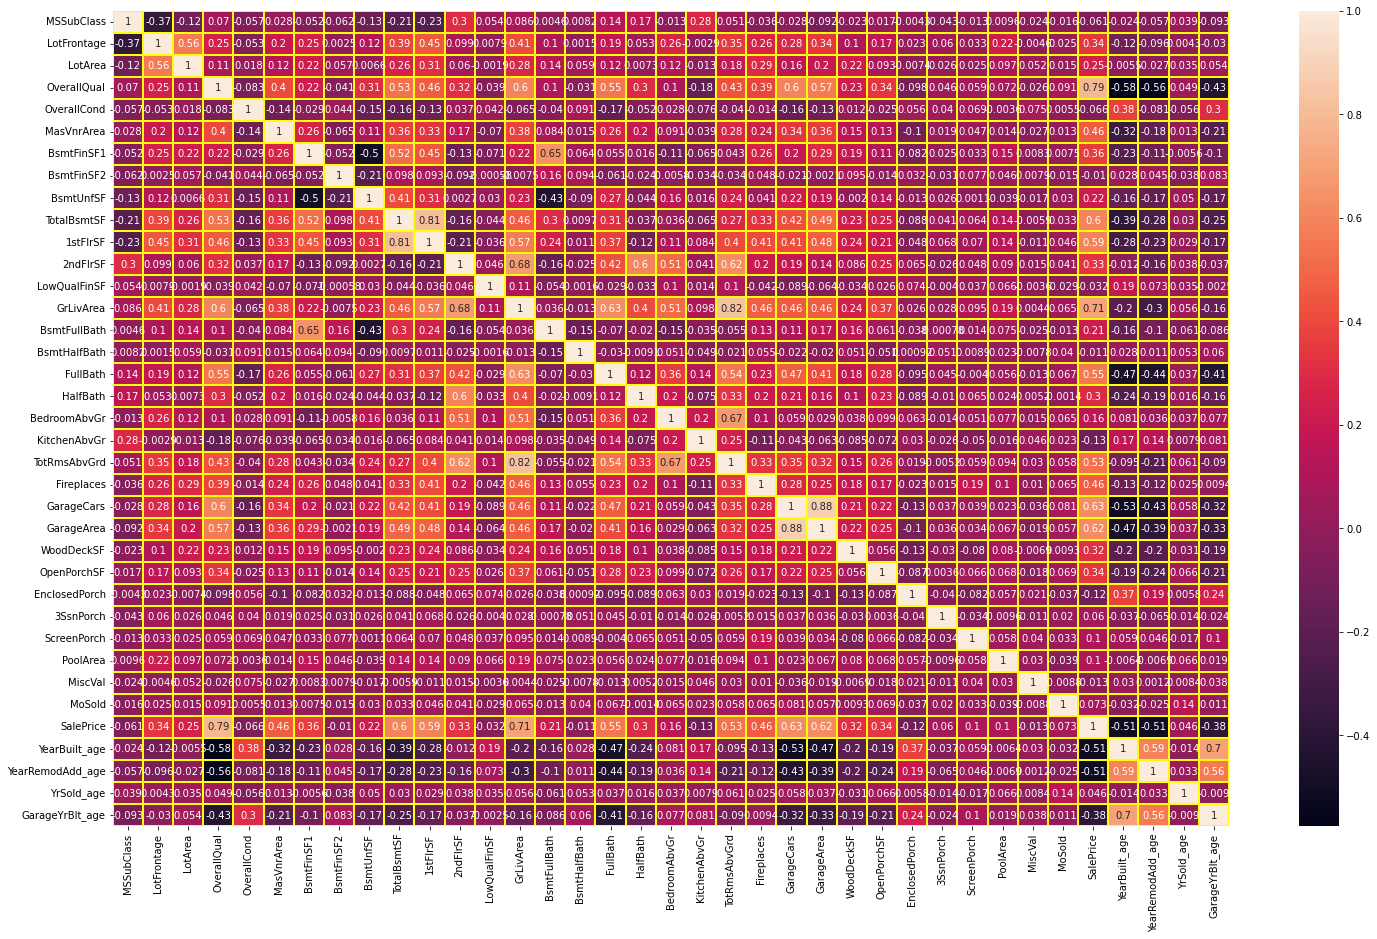

In [102]:
plt.subplots(figsize=(25,15))
sns.heatmap(train.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

### Correlation of Other features with SalePrice(target variable):

<AxesSubplot:title={'center':'feature vs SalePrice corr'}>

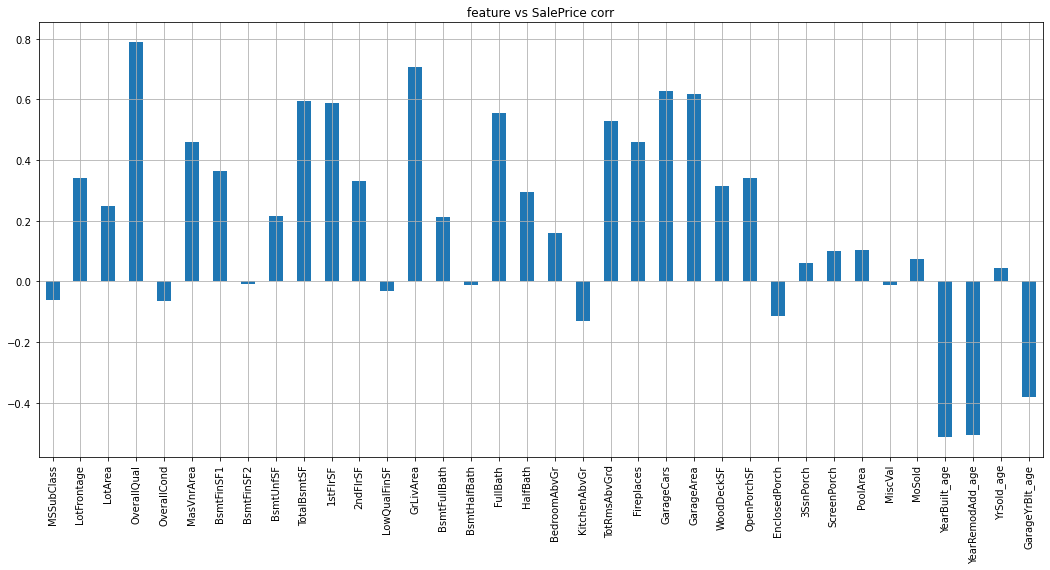

In [103]:
train.drop("SalePrice",axis=1).corrwith(train["SalePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs SalePrice corr')


### Outlier Detection of training data:

In [104]:
# Lets sort Columns by their datatype

train.columns.to_series().groupby(train.dtypes).groups

{int64: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt_age'], object: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 

### Dividing numerical & categorical features

In [105]:
num_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'MoSold', 'SalePrice', 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age','LotFrontage',
                'MasVnrArea', 'GarageYrBlt_age' ]

cat_features= ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
               'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 
               'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

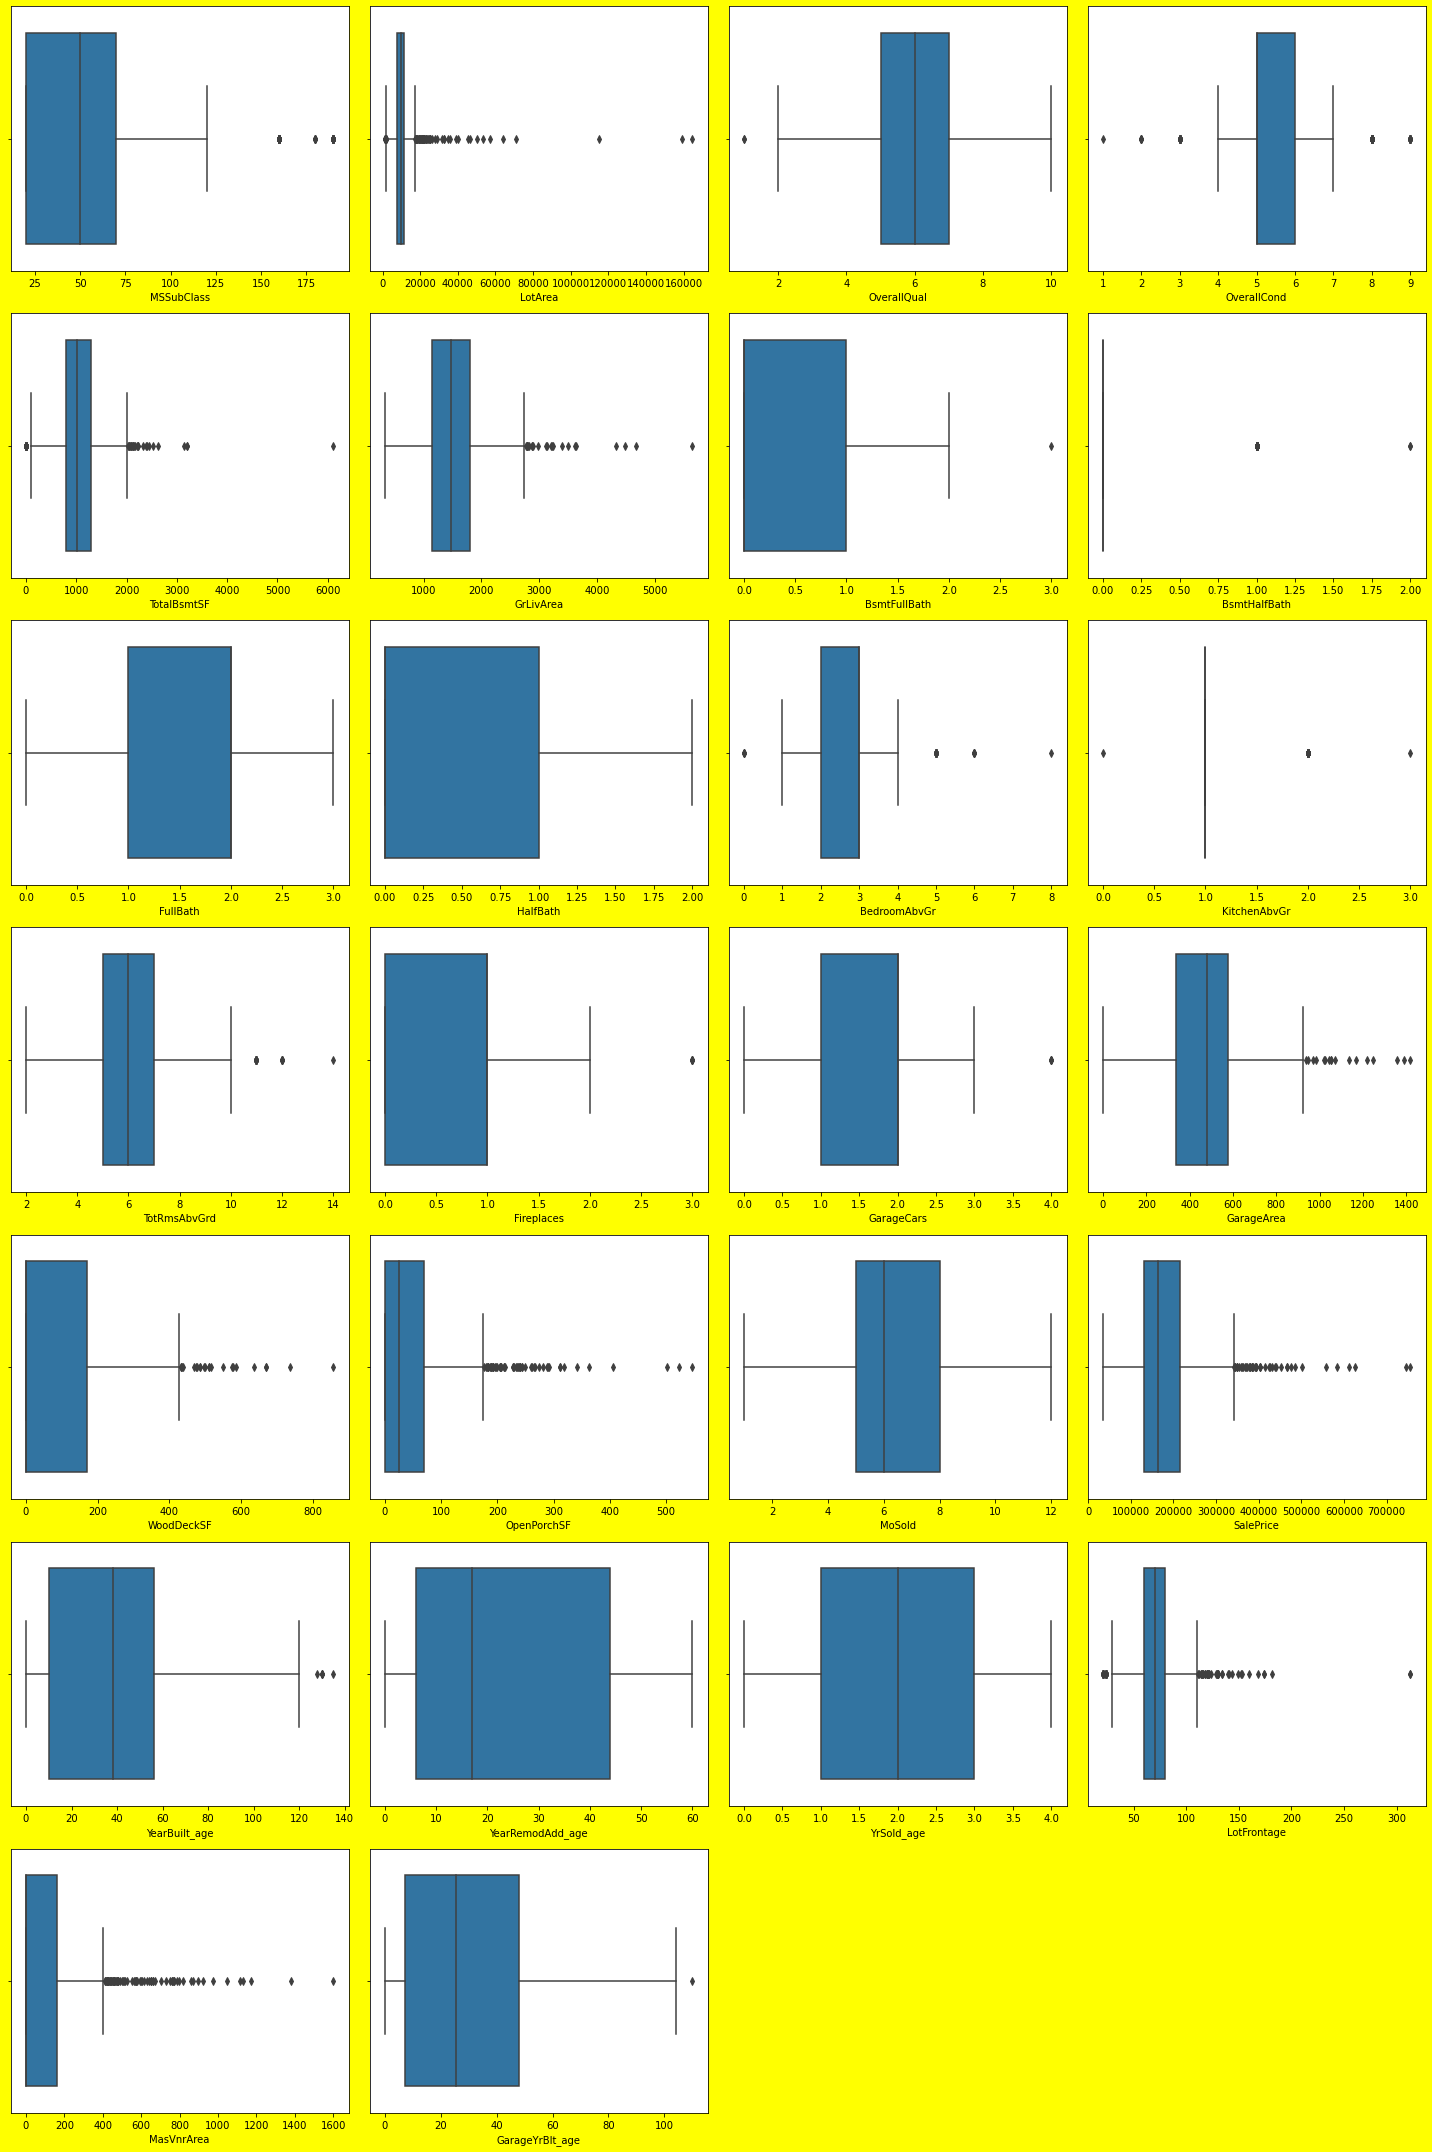

In [106]:
plt.figure(figsize=(20,30),facecolor='yellow')
pltno=1
for x in num_features:
    if pltno<=26:
        ax=plt.subplot(7,4,pltno)
        sns.boxplot(train[x])
        plt.xlabel(x)
    pltno+=1
plt.tight_layout()
plt.show()

### Skewness

In [108]:
train.skew().sort_values()

GarageCars          -0.358556
YrSold_age          -0.115765
FullBath             0.057809
OverallQual          0.175082
GarageArea           0.189665
MoSold               0.220979
BedroomAbvGr         0.243855
YearRemodAdd_age     0.495864
YearBuilt_age        0.579204
OverallCond          0.580714
BsmtFullBath         0.627106
TotRmsAbvGrd         0.644657
HalfBath             0.656492
Fireplaces           0.671966
GarageYrBlt_age      0.708074
2ndFlrSF             0.823479
BsmtUnfSF            0.909057
MSSubClass           1.422019
GrLivArea            1.449952
WoodDeckSF           1.504929
1stFlrSF             1.513707
TotalBsmtSF          1.744591
BsmtFinSF1           1.871606
SalePrice            1.953878
OpenPorchSF          2.410840
LotFrontage          2.450241
MasVnrArea           2.835718
EnclosedPorch        3.043610
ScreenPorch          4.105741
BsmtHalfBath         4.264403
KitchenAbvGr         4.365259
BsmtFinSF2           4.365829
LowQualFinSF         8.666142
3SsnPorch 

In [109]:
data= train.copy()

In [110]:
skew_data = ['MSSubClass', 'GrLivArea','WoodDeckSF',
             'TotalBsmtSF','OpenPorchSF', 
             'LotFrontage','MasVnrArea','BsmtHalfBath',
             'KitchenAbvGr','LotArea']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [111]:
data[skew_data] = scaler.fit_transform(data[skew_data].values)
data.head()

MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour LotConfig  \
0    1.370435       RL          NaN -1.213954      IR1         Lvl    Inside   
1   -1.167999       RL     1.029028  1.100521      IR1         Lvl    Inside   
2    0.490047       RL     0.923263  0.158048      IR1         Lvl   CulDSac   
3   -1.167999       RL     1.366436  0.496002      IR1         Lvl    Inside   
4   -1.167999       RL          NaN  1.196626      IR1         Lvl       FR2   

  LandSlope Neighborhood BldgType  ... PoolArea  MiscVal  MoSold SaleType  \
0       Gtl      NPkVill   TwnhsE  ...        0        0       2       WD   
1       Mod        NAmes     1Fam  ...        0        0      10       WD   
2       Gtl      NoRidge     1Fam  ...        0        0       6       WD   
3       Gtl       NWAmes     1Fam  ...        0        0       1      COD   
4       Gtl       NWAmes     1Fam  ...        0        0       6       WD   

  SaleCondition SalePrice YearBuilt_age YearRemodAdd_age  YrSold_age  \
0        Normal    128000            34               34           3   
1        Normal    268000            40               40           3   
2        Normal    269790            14               13           3   
3        Normal    190000            33               33           0   
4        Normal    215000            33               10           1   

  GarageYrBlt_age  
0            33.0  
1            40.0  
2            13.0  
3            33.0  
4            33.0  

[5 rows x 71 columns]

In [112]:
data.skew().sort_values()

KitchenAbvGr        -2.370593
GarageCars          -0.358556
YrSold_age          -0.115765
OpenPorchSF         -0.002749
GrLivArea           -0.000054
LotArea              0.032509
FullBath             0.057809
MSSubClass           0.064007
LotFrontage          0.106749
WoodDeckSF           0.113026
OverallQual          0.175082
GarageArea           0.189665
MoSold               0.220979
BedroomAbvGr         0.243855
TotalBsmtSF          0.286779
MasVnrArea           0.439526
YearRemodAdd_age     0.495864
YearBuilt_age        0.579204
OverallCond          0.580714
BsmtFullBath         0.627106
TotRmsAbvGrd         0.644657
HalfBath             0.656492
Fireplaces           0.671966
GarageYrBlt_age      0.708074
2ndFlrSF             0.823479
BsmtUnfSF            0.909057
1stFlrSF             1.513707
BsmtFinSF1           1.871606
SalePrice            1.953878
EnclosedPorch        3.043610
BsmtHalfBath         3.954345
ScreenPorch          4.105741
BsmtFinSF2           4.365829
LowQualFin

### Encoding for Training data:

In [113]:
# Using Label encoder for transforming categorical data of train data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0    1.370435         3          NaN -1.213954         0            3   
1   -1.167999         3     1.029028  1.100521         0            3   
2    0.490047         3     0.923263  0.158048         0            3   
3   -1.167999         3     1.366436  0.496002         0            3   
4   -1.167999         3          NaN  1.196626         0            3   

   LotConfig  LandSlope  Neighborhood  BldgType  ...  PoolArea  MiscVal  \
0          4          0            13         4  ...         0        0   
1          4          1            12         0  ...         0        0   
2          1          0            15         0  ...         0        0   
3          4          0            14         0  ...         0        0   
4          2          0            14         0  ...         0        0   

   MoSold  SaleType  SaleCondition  SalePrice  YearBuilt_age  \
0       2         8              4     128000             34   
1      10         8              4     268000             40   
2       6         8              4     269790             14   
3       1         0              4     190000             33   
4       6         8              4     215000             33   

   YearRemodAdd_age  YrSold_age  GarageYrBlt_age  
0                34           3             33.0  
1                40           3             40.0  
2                13           3             13.0  
3                33           0             33.0  
4                10           1             33.0  

[5 rows x 71 columns]

### Data Scaling:
Standard Scaling of train data:

In [114]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [115]:
# Splitting data in target and dependent feature
x = data.drop(['SalePrice'], axis =1)
y = data['SalePrice']
x_scale = scaler.fit_transform(x)

### Final predictions using different Classification ML Models for Loan_Status:
Find best Random state:

In [117]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(500,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [118]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (876, 70)
Training target shape: (876,)
Test feature shape: (292, 70)
Test target shape: (292,)
